In [1]:
from manim import *

Manim Community v0.17.3

In [2]:
config.media_width = "100%"
config.verbosity = "WARNING"
config.background_color = WHITE

In [27]:
%%manim -pql OctArea
from manim import *

config.background_color=WHITE
scale_factor= 3
vertices = [np.array([scale_factor*np.cos(angle), scale_factor*np.sin(angle), 0]) for angle in np.linspace(0, 2*np.pi, 9)]
octagon = Polygon(*vertices,color=BLACK)
class OctArea(Scene):
    def construct(self):
        octagon.rotate(angle=PI/8).joint_type=LineJointType.ROUND
        self.play(Create(octagon),run_time=3)
        #self.play(Rotate(,angle=PI/8))
        line1 = Line(octagon.get_vertices()[2], octagon.get_vertices()[5],color=BLACK)
        line2 = Line(octagon.get_vertices()[0], octagon.get_vertices()[4],color=BLACK)
        self.play(Create(line1),Create(line2))
        self.wait(2)
        intersect_point = self.find_intersection(line1,line2)
        dot=Dot(intersect_point,color=BLACK,radius=0.01)
        line3 = Line(dot, octagon.get_vertices()[7],color=BLACK)
        self.play(Create(line3))
        self.wait(1)
        polygon_vertices = [
            line3.get_start(),
            line3.get_end(),
            self.find_intersection(line1,line3),
            line1.get_end(),
            octagon.get_vertices()[5],
            octagon.get_vertices()[6],
            octagon.get_vertices()[7]
        ]
        polygon = Polygon(*polygon_vertices,stroke_width=0)
        polygon.joint_type=LineJointType.ROUND
        self.play(Create(polygon),polygon.animate.set_fill(color=PINK,opacity=0.5))
        question = Text(r"What fraction of the octagon is shaded in pink?",color=BLUE,font_size=30)
        question.next_to(octagon,DOWN)
        self.add(question)
        self.wait(5)
        self.play(Uncreate(question),run_time=0.1)
        self.wait(3)
        diagonals = VGroup(
            #DashedLine( octagon.get_vertices()[0],octagon.get_vertices()[4],color=BLACK,stroke_width=2),
            DashedLine( octagon.get_vertices()[1],octagon.get_vertices()[5],color=BLACK,stroke_width=2),
            DashedLine( octagon.get_vertices()[2],octagon.get_vertices()[6],color=BLACK,stroke_width=2),
            DashedLine( octagon.get_vertices()[3],octagon.get_vertices()[7],color=BLACK,stroke_width=2),
          #Line(center,octagon.get_vertices()[5],color=BLACK)
        )
        self.play(FadeIn(diagonals))
        self.wait(2)
        A = Dot(intersect_point,radius=0.01,color=BLACK)
        B = Dot(line3.get_end(),radius=0.01,color=BLACK)
        C = Dot(line1.get_end(),radius=0.01,color=BLACK)
        center=octagon.get_center()
        triangle1 =Polygon(A.get_center(),B.get_center(),C.get_center(),color=PURE_RED)
        self.add(A,B,C)
        triangle1.joint_type=LineJointType.ROUND
        self.play(Create(triangle1))
        pline2 = Line(octagon.get_vertices()[5],octagon.get_vertices()[7],color=PURE_RED)
        self.wait(3)
        arrow_1 = Arrow(start=line2.get_end(), end=line2.get_center(), color=BLACK,stroke_width=1)
        arrow_2 = Arrow(start=pline2.get_start(), end=pline2.get_center(), color=BLACK,stroke_width=1)
        self.play(Indicate(line2),Indicate(pline2),color=None,run_time=2)
        self.add(arrow_1,arrow_2)
        self.wait()
        NewDot = Dot(intersect_point,radius=0.1,color=PURE_RED)
        triangle1.add_updater(lambda x:x.become(Polygon(NewDot.get_center(),line3.get_end(),line1.get_end(),color=PURE_RED)))
        self.play(NewDot.animate.move_to(octagon.get_center()),run_time=4.5)
        self.wait(4)
        final_polygon = Polygon(center,
                                octagon.get_vertices()[5],
                                octagon.get_vertices()[6],
                                octagon.get_vertices()[7],color=None,stroke_width=0)
        newline = DashedLine(octagon.get_vertices()[0], octagon.get_vertices()[4],color=BLACK,stroke_width=2)
        full_polygon = VGroup(final_polygon,octagon,diagonals)
        groups = AnimationGroup(AnimationGroup(FadeOut(NewDot)),
                                AnimationGroup(FadeIn(final_polygon),FadeOut(polygon),
                                                final_polygon.animate.set_fill(color=PINK,opacity=0.5).set_z_index(0)),
                                AnimationGroup(FadeOut(pline2),
                                            FadeOut(line3),FadeOut(line1),FadeOut(arrow_1),
                                            FadeOut(arrow_2),FadeOut(line2),
                                            FadeIn(newline)),FadeOut(triangle1),
                                            lag_ratio=1.5,run_time=6)
        self.play(groups)
        self.wait(2)
        eq = MathTex(r"\Rightarrow ",color=BLUE)
        eq.next_to(octagon)
        self.play(Write(eq))
        s1 = MathTex(r" \frac{2}{}",color=BLUE)
        s1.next_to(eq)
        self.play(Indicate(final_polygon),scale_factor=1,color=PINK,run_time=2)
        self.add(s1)
        self.wait(1)
        full_polygon = VGroup(final_polygon,octagon,diagonals)
        full_polygon.save_state()
        for sector in range(0,8):
            sectors = Polygon(octagon.get_vertices()[sector],octagon.get_vertices()[sector+1],center,color=BLACK)
            sectors.joint_type=LineJointType.ROUND
            #sectors.set_fill(color=ORANGE,opacity=0.5)
            self.play(Indicate(sectors),scale_factor=1,color=ORANGE,run_time=0.3)
            #self.play(FadeOut(sectors),run_time=0.5)
            #self.remove(sectors)
        s2 = MathTex(r" \frac{2}{8} ",color=BLUE)
        self.add(s1.become(s2).next_to(eq))
        #self.add(s1)
        self.wait(1)
        full_polygon.restore()
        new = MathTex(r"  =\frac{1}{4}",color=BLUE)
        new.next_to(s2,16*RIGHT)
        self.add(new)
        self.wait(4)
    def find_intersection(self, line1, line2):
        p1, p2 = line1.get_start_and_end()
        p3, p4 = line2.get_start_and_end()
        x1, y1 = p1[0], p1[1]
        x2, y2 = p2[0], p2[1]
        x3, y3 = p3[0], p3[1]
        x4, y4 = p4[0], p4[1]
        det = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
        if det == 0:
            return None
        t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / det
        intersection_x = x1 + t * (x2 - x1)
        intersection_y = y1 + t * (y2 - y1)
        return np.array([intersection_x, intersection_y, 0])

In [29]:
from manim import *
config.media_width = "100%"
config.verbosity = "WARNING"
config.frame_size = (1080,1920)
config.frame_width = 7.5

from manim import *
config.background_color=BLACK
class TwoSquares(MovingCameraScene):
    def construct(self):
        
        
        
        #Create squares
        square1 = Square(fill_opacity=0, stroke_width=4, stroke_color=WHITE).scale(2).set_z_index(2).shift(LEFT)
        square2 = Square(fill_opacity=0, stroke_width=4, stroke_color=WHITE).scale(1).set_z_index(2).shift(LEFT)
        squareGroup = VGroup(square1, square2)
        

        #Position square2
        square2.next_to(square1, RIGHT, buff=0).shift(DOWN)
        
        #JoinType
        square1.joint_type=LineJointType.ROUND 
        square2.joint_type=LineJointType.ROUND 
        
        #Add dots
        dot1 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(UL)).set_z_index(4)
        dot2 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(UR)).set_z_index(4)
        dot3 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(DL)).set_z_index(4)
        dot4 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(DR)).set_z_index(4)
        dot5 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(UL)).set_z_index(4)
        dot6 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(UR)).set_z_index(4)
        dot7 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(DR)).set_z_index(4)
        
        
        
        #Create lines to form the question
        line1 = Line(square1.get_corner(UR), square2.get_corner(UR), color=WHITE, stroke_width=4).set_z_index(2)
        line2 = Line(square1.get_corner(UL), square2.get_corner(UL), color=WHITE, stroke_width=4).set_z_index(2)
        line3 = Line(square2.get_corner(UL), square1.get_corner(DL), color=WHITE, stroke_width=4).set_z_index(2)
        line4 = Line(square2.get_corner(UR), square1.get_corner(DL), color=WHITE, stroke_width=4).set_z_index(2)
        
        #Make a polygon using the lines
        polygon = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square1.get_corner(DL),
            square2.get_corner(UL), square1.get_corner(UL),
            fill_color="#3DD771", fill_opacity=1, color=WHITE
        )
        
        
        #JoinType
        polygon.joint_type=LineJointType.ROUND 

        X = self.camera.frame.animate.scale(1.5).move_to(polygon)
        X.save_state()
        self.play(X)
        
        #Show the size of square1
        
        arrow1 = Arrow(DOWN, UP, max_tip_length_to_length_ratio=0.1).next_to(square1, LEFT+UP, buff=0.5).shift(2*DOWN)
        arrow2 = Arrow(UP, DOWN, max_tip_length_to_length_ratio=0.1).next_to(square1, LEFT+DOWN, buff=0.5).shift(2*UP)
        arrows = VGroup(arrow1, arrow2)
        arrows.set_color(WHITE)
        arrows.set_stroke(width = 4)
        #arrows.set_x(0)
        
        size = MathTex("12").set_color(WHITE).set_stroke(width = 1).scale(0.8)
        size.next_to(arrow1, DOWN, buff = 0.35)
        #size.scale(0.8)
        
        #Add everything
        #self.add(square1, square2, line1, line2, line3, line4, polygon)
    
        
        self.play(GrowFromEdge(square1, DR, point_color=WHITE))
        #self.play(Create(square1))
        self.wait()
        self.play(GrowArrow(arrows[1], point_color=WHITE), GrowArrow(arrows[0], point_color=WHITE), FadeIn(size))
        self.wait()
        self.play(GrowFromEdge(square2, DL, point_color=WHITE))
        #self.play(Create(square2))
        self.wait()
        
        self.play(FadeIn(dot1, dot2, dot3, dot4, dot5, dot6, dot7))
        self.wait(2)
        
        self.play(Create(line1))
        self.play(Create(line4))
        self.play(Create(line2))
        self.play(Create(line3))
        self.wait()
        questionText = Text("Area of the shaded portion?", color = WHITE, font='Athletics').next_to(dot2, UP, buff=1.5).scale(0.8)

        self.play(FadeIn(polygon))
        self.wait()
        
        self.wait(2)
        #shift_amount = LEFT * 2 
        #camera_frame = self.camera.frame
        question = polygon.copy()
        question.set_stroke(width = 2)
        equal_to_what = Text(" = ? ").scale(0.8).set_color(WHITE).set_stroke(width = 1).next_to(square2, RIGHT, buff=1).shift(RIGHT+0.06*UP)
        Y = self.camera.frame.animate.move_to(RIGHT)
        self.play(question.animate.next_to(square2, RIGHT).scale(0.15).shift(2*LEFT), FadeIn(equal_to_what), Y, FadeIn(questionText))

        self.wait(5)
        
        #Dashed Lines for solving
        dashed_1 = DashedLine(config.left_side, config.right_side, stroke_width=3)
        dashed_1.move_to(square2, DOWN).set_length(8)
       
        
        self.play(FadeOut(question), FadeOut(equal_to_what, questionText))
        self.wait()
        
        # Show parallel lines
        l1 = Line(square2.get_corner(UL), square2.get_corner(UR), color=PURE_RED, stroke_width=4).set_z_index(2)
        #l2 = Line(square1.get_corner(DL), square2.get_corner(DR), color=PURE_RED, stroke_width=4).set_z_index(2)
        l3 = Line(square1.get_corner(UL), square1.get_corner(UR), color=PURE_RED, stroke_width=4).set_z_index(2)
        l4 = Line(dot3.get_center(), dot7.get_center(), color=PURE_RED, stroke_width=4).set_z_index(2)
        l5 = Line(dot3.get_center(), dashed_1.get_end(), color=PURE_RED, stroke_width=4).set_z_index(2)
        self.play(FadeIn(l1, l4))
        self.play(Indicate(l1, color = None), Indicate(l4, color = None))
        self.play(FadeOut(l1, l4))
        self.wait()
        #Indicate tri1
        
        tri1 = Polygon(dot3.get_center(), dot5.get_center(), dot6.get_center(), color = "#A020F0", fill_opacity=1)
        self.play(FadeIn(tri1))
        self.wait(0.5)
        self.play(FadeOut(tri1))
        
        #self.play(Indicate(tri1, color = "#9E2F00", scale_factor=1), run_time=1.5)
        
        
        # First move
        
        polygon_4sides = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square2.get_corner(UL),
            square1.get_corner(UL),
            fill_color="#3DD771", fill_opacity=1, color=WHITE, stroke_width = 4
        )
        
        
        
        dot8 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(DR)).set_z_index(4)
        dot8.shift(2*RIGHT)
        #self.play(FadeIn(dot8))
        
        A = Dot(line1.get_end(),radius=0.01,color=BLACK)
        B = Dot(line3.get_end(),radius=0.01,color=BLACK)
        C = Dot(line1.get_end(),radius=0.01,color=BLACK)        
       
        triangle1 =Polygon(A.get_center(),B.get_center(),C.get_center(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=4)
        
        
        self.add(triangle1, polygon_4sides)
        triangle1.joint_type=LineJointType.ROUND
        self.play(Create(triangle1))
        self.wait()
        
        #line_a1 = Line(square2.get_corner(UL), square1.get_corner(DL), color=BLACK)  # Modify this line
        #line_a2 = Line(square2.get_corner(UR), square1.get_corner(DL), color=BLACK)  # Modify this line
        
        dot3_copy = dot3.copy()
        dot3_copy.set_color(PURE_RED).set_stroke(width = 4, color  =WHITE)
        self.play(FadeIn(dot3_copy))
        self.play(Indicate(dot3_copy, scale_factor=1.7, color = None))
        self.play(FadeIn(l4))
        self.wait(2)
        self.play(FadeIn(dashed_1))
        triangle1.add_updater(lambda x:x.become(Polygon(dot3_copy.get_center(),line3.get_start(),line4.get_start(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=4)))
        self.play( FadeOut(polygon), FadeOut(line3), FadeOut(line4) )
        self.play(FadeOut(l4), FadeIn(l5))
        self.play(dot3_copy.animate.move_to(dot8.get_center()),run_time=2)
        self.wait(0.7)
        
        # Show second parallel lines
        
        #Indicate tri2
        tri2 = Polygon(dot1.get_center(), dot2.get_center(), dot8.get_center(), color = "#A020F0", fill_opacity=1, stroke_width=4, stroke_color = WHITE)
        self.play(FadeIn(tri2))
        self.wait(0.5)
        self.play(FadeOut(tri2))
        self.wait(2)
        
        #self.play(Indicate(tri2, color = "#9E2F00", scale_factor=1), run_time=1.5)
        
        
        self.play(FadeIn(l3))
        self.play(Indicate(l3, color = None), Indicate(l5, color = None))
        self.play(FadeOut(l3, l5))
        self.wait()
        
        #Second move
        
        X = Dot(line1.get_start(),radius=0.01,color=BLACK)
        Y = Dot(line2.get_start(),radius=0.01,color=BLACK)
        Z = Dot(dot8.get_center(),radius=0.01,color=BLACK)        
        
        triangle2 =Polygon(X.get_center(),Y.get_center(),Z.get_center(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=4)
        
        
        self.add(triangle2)
        triangle2.joint_type=LineJointType.ROUND
        self.play(Create(triangle2))
        self.wait()
        
        
        
        #line_a1 = Line(square2.get_corner(UL), square1.get_corner(DL), color=BLACK)  # Modify this line
        #line_a2 = Line(square2.get_corner(UR), square1.get_corner(DL), color=BLACK)  # Modify this line
        
        dot8_copy = dot8.copy()
        dot8_copy.set_color(PURE_RED).set_stroke(width = 4, color  =WHITE)
        self.play(FadeIn(dot8_copy))
        self.play(Indicate(dot8_copy, scale_factor=1.7, color = None), FadeOut(dot3_copy))
        self.play(FadeIn(l5))
        self.wait()
        linef1 = Line(square1.get_corner(UR), dot8_copy.get_center(), color=WHITE, stroke_width=4)
        linef2 = Line(square1.get_corner(UL), dot8_copy.get_center(), color=WHITE, stroke_width=4)
        
        triangle2.add_updater(lambda x:x.become(Polygon(dot8_copy.get_center(),linef1.get_start(),linef2.get_start(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=4)))
        
        self.play(FadeOut(polygon_4sides), FadeOut(triangle1), FadeOut(line1), FadeOut(line2))
        
        self.play(dot8_copy.animate.move_to(dot4.get_center()),run_time=2)
        self.wait()
        
        self.play(FadeOut(dot8_copy, l5, dashed_1 ), self.camera.frame.animate.move_to(polygon))
        self.wait(0.7)
        self.wait(2)
        
        # Show answer
        #line = Tex("Area of the shaded portion =")
        #eqn = MathTex(r" \frac{1}{2} ").next_to(line, buff = 0.5)
        #star = Tex("*").next_to(eqn, buff = 0.5)
        #ans = Tex("Area of the bigger square ").next_to(star, buff = 0.5)
        #eqn1 = VGroup(line,eqn,star,ans)
        #eqn1.next_to(dot4, DOWN, buff = 0.5).scale(0.7)
        #self.play(FadeIn(eqn1))
        #self.wait()
        
        #num = Tex("(12 * 12)").scale(0.7).next_to(star, buff = 0.5)
        #self.play(ReplacementTransform(ans,num))
        #self.wait()
        
        #equal_to = Tex("=").next_to(num, buff = 0)
        #final_ans = Tex("72 sq. units").next_to(equal_to, buff = 0.5)
        #equal_to_final_ans = VGroup(equal_to, final_ans).scale(0.7)
        #self.play(FadeIn(equal_to_final_ans))
        #self.wait(2)
        
        tri3 = Polygon(dot1.get_center(), dot2.get_center(), dot4.get_center(), color = "#A020F0", fill_opacity=1, stroke_width=4, stroke_color = WHITE)
        self.play(FadeIn(tri3))
        self.wait(0.5)
        self.play(FadeOut(tri3))
        A = MathTex("A(", "\phantom{xxx}", ")").next_to(square1, 6* DOWN).shift(0.7*LEFT)
        tri3_copy = Polygon(dot1.get_center(), dot2.get_center(), dot4.get_center(), color = "#3DD771", fill_opacity=1, stroke_width=4, stroke_color = WHITE)

        self.play(FadeIn(A), tri3_copy.animate.scale(0.13).move_to(A).shift(0.17*RIGHT))
        equal_to = MathTex("=").next_to(A, buff = 0.2)
        self.play(FadeIn(equal_to))
        eqn = MathTex(r" \frac{1}{2} ").next_to(equal_to, buff = 0.2)
        self.play(FadeIn(eqn))
        star = MathTex("\\times").next_to(eqn, buff = 0.2)
        self.play(FadeIn(star))
        B = MathTex("A(", "\phantom{xxx}", ")").next_to(star, buff = 0.2)
        square1_copy = square1.copy()
        self.play(FadeIn(B), square1_copy.animate.scale(0.13).move_to(B).shift(0.2*RIGHT).set_fill(color = "#3DD771", opacity = 1))
        self.wait(2)
        size_copy = size.copy()
        #self.play(size_copy.animate.next_to(star, buff = 0.2).scale(1.25), FadeOut(B, square1_copy))
        twlvSq = MathTex("12^2").next_to(star, buff = 0.2).shift(0.1*UP).scale(0.9)
        self.play(FadeTransform(size_copy, twlvSq), FadeOut(B, square1_copy))
        self.wait(2)
        
        eqnGrp = VGroup(eqn, star, twlvSq)
        
        sevTwo = MathTex("72\ sq.\ units").next_to(equal_to, buff = 0.2)
        
        self.play(TransformMatchingTex(eqnGrp, sevTwo))
        self.wait(2)
        
        finalAns = VGroup(A, B, tri3_copy, equal_to, sevTwo)
        
        box = SurroundingRectangle(finalAns, color=YELLOW, buff=MED_LARGE_BUFF)
        
        self.play(Create(box))
        
        self.wait(2)

In [5]:
pip install --upgrade manim

Note: you may need to restart the kernel to use updated packages.


In [6]:
#self.camera.frame.animate.shift(move_x)
#square2.joint_type=LineJointType.BEVEL

In [7]:
%%manim -pql OctArea
from manim import *

config.background_color=WHITE
scale_factor= 3     
vertices = [np.array([scale_factor*np.cos(angle), scale_factor*np.sin(angle), 0]) for angle in np.linspace(0, 2*np.pi, 9)]
octagon = Polygon(*vertices,color=BLACK)
        

class OctArea(Scene):
    def construct(self):  
        
        octagon.rotate(angle=PI/8).shift(0.5*UP).joint_type=LineJointType.ROUND

        self.play(Create(octagon),run_time=3)
        #self.play(Rotate(,angle=PI/8))

        line1 = Line(octagon.get_vertices()[2], octagon.get_vertices()[5],color=BLACK)
        line2 = Line(octagon.get_vertices()[0], octagon.get_vertices()[4],color=BLACK)
        self.play(Create(line1),run_time=0.5)
        self.play(Create(line2),run_time=0.5)
    
        intersect_point = self.find_intersection(line1,line2)
        dot=Dot(intersect_point,color=BLACK,radius=0.01)
        line3 = Line(dot, octagon.get_vertices()[7],color=BLACK)
        self.wait(1)
        self.play(Create(line3))
        self.wait(1)
        polygon_vertices = [
            line3.get_start(),
            line3.get_end(),
            self.find_intersection(line1,line3),
            line1.get_end(),
            octagon.get_vertices()[5],
            octagon.get_vertices()[6],
            octagon.get_vertices()[7]
        ]
        polygon = Polygon(*polygon_vertices,stroke_width=0,color=BLACK)
        polygon.set_z_index=2
        polygon.joint_type=LineJointType.ROUND
        polygon.set_fill(color='#B03882',opacity=0.5)
        self.play(FadeIn(polygon))
    
        question = Text("What fraction of the octagon is shaded in pink?",
                        t2c = {"[:41]":'#2B2B2B','[42:46]':'#B03882','[46:47]':'#2B2B2B'},font_size=30)
        question.next_to(octagon,1.8*DOWN)
        self.add(question)
        self.wait(5)
        self.play(Uncreate(question),run_time=0.1)
        self.wait(3)
        
            #DashedLine( octagon.get_vertices()[0],octagon.get_vertices()[4],color=BLACK,stroke_width=2),
        diag1 =  DashedLine( octagon.get_vertices()[1],octagon.get_vertices()[5],color=BLACK,stroke_width=2)
        diag2 =  DashedLine( octagon.get_vertices()[2],octagon.get_vertices()[6],color=BLACK,stroke_width=2)
        diag3= DashedLine( octagon.get_vertices()[3],octagon.get_vertices()[7],color=BLACK,stroke_width=2)
        diagonals = VGroup(diag1,diag2,diag3)
          #Line(center,octagon.get_vertices()[5],color=BLACK) 
        

        
        
        diag=AnimationGroup(FadeIn(diag1),FadeIn(diag2),FadeIn(diag3),lag_ratio=1,run_time=0.8)
        self.play(diag)
        self.wait(2)


        A = Dot(intersect_point,radius=0.01,color=BLACK)
        B = Dot(line3.get_end(),radius=0.01,color=BLACK)
        C = Dot(line1.get_end(),radius=0.01,color=BLACK)        
        center=octagon.get_center()
        
        triangle1 =Polygon(A.get_center(),B.get_center(),C.get_center(),color=PURE_RED)
        self.add(A,B,C)
        triangle1.joint_type=LineJointType.ROUND
        self.play(Create(triangle1))
        pline2 = Line(octagon.get_vertices()[5],octagon.get_vertices()[7],color=PURE_RED)  
        self.wait(3)


        
        arrow_1 = Arrow(start=line2.get_end(), end=line2.get_center(), color=BLACK,stroke_width=0.5,max_tip_length_to_length_ratio=0.08)
        arrow_2 = Arrow(start=pline2.get_start(), end=pline2.get_center(), color=BLACK,stroke_width=0.5,max_tip_length_to_length_ratio=0.12)

        self.play(Indicate(line2),Indicate(pline2),color=None,run_time=2)
        self.add(arrow_1,arrow_2)
        
        self.wait()

    
        NewDot = Dot(intersect_point,radius=0.1,color=PURE_RED)
        self.add(NewDot)
        triangle1.add_updater(lambda x:x.become(Polygon(NewDot.get_center(),line3.get_end(),line1.get_end(),color=PURE_RED)))
        self.play(NewDot.animate.move_to(octagon.get_vertices()[4]),run_time=2)
        self.wait(0.3)
        self.play(NewDot.animate.move_to(octagon.get_vertices()[0]),run_time=3)
        self.wait(0.7)

        self.play(NewDot.animate.move_to(octagon.get_center()),run_time=4)
        self.wait(4)
        final_polygon = Polygon(center,
                                octagon.get_vertices()[5],
                                octagon.get_vertices()[6],
                                octagon.get_vertices()[7],color=None,stroke_width=0)
        newline = DashedLine(octagon.get_vertices()[0], octagon.get_vertices()[4],color=BLACK,stroke_width=2)
        
        full_polygon = VGroup(final_polygon,octagon,diagonals)
        groups = AnimationGroup(AnimationGroup(FadeOut(NewDot)),
                                AnimationGroup(FadeIn(final_polygon),FadeOut(polygon),
                                                final_polygon.animate.set_fill(color=PINK,opacity=0.5).set_z_index(0)),
                                AnimationGroup(FadeOut(pline2),
                                            FadeOut(line3),FadeOut(line1),FadeOut(arrow_1),
                                            FadeOut(arrow_2),FadeOut(line2),
                                            FadeIn(newline)),
                                            lag_ratio=.5,run_time=6,rate_function=linear)
        
        self.play(groups)
        self.play(FadeOut(triangle1))
        self.wait(0.7)
       
      
        eq = MathTex(r"\Rightarrow ",color=BLUE)
        eq.next_to(octagon)
        self.play(Write(eq))
        s1 = MathTex(r" \frac{2}{}",color=BLUE)
        s1.next_to(eq)
        
        
        self.play(Indicate(final_polygon),scale_factor=1,color=PINK,run_time=2)
        self.add(s1)
        self.wait(1)
        full_polygon = VGroup(final_polygon,octagon,diagonals)
        full_polygon.save_state()
       
        for sector in range(0,8):
            if sector==5 or sector==6:
                sectors = Polygon(octagon.get_vertices()[sector],octagon.get_vertices()[sector+1],center,color="#9E2F00")
                sectors.joint_type=LineJointType.ROUND
                self.play(Indicate(sectors),scale_factor=1,color="#9E2F00",run_time=0.3)
            
            #sectors.set_fill(color=ORANGE,opacity=0.5)
            
            else:
                sectors = Polygon(octagon.get_vertices()[sector],octagon.get_vertices()[sector+1],center,color="#9E2F00")
                sectors.joint_type=LineJointType.ROUND
                self.play(Indicate(sectors),sectors.animate.set_fill(color="#FF7E3B",opacity=0.5),scale_factor=1,color="#9E2F00",run_time=0.3)
            #self.play(FadeOut(sectors),run_time=0.5)
            #self.remove(sectors)
        s2 = MathTex(r" \frac{2}{8} ",color=BLUE)
        self.add(s1.become(s2).next_to(eq))
        
        #self.add(s1)
        self.wait(1)
        full_polygon.restore()
        new = MathTex(r" =\frac{1}{4}",color=BLUE)
        new.next_to(eq,3*RIGHT)
        self.add(new)
        self.wait(4)
        
        



    def find_intersection(self, line1, line2):
        p1, p2 = line1.get_start_and_end()
        p3, p4 = line2.get_start_and_end()

        x1, y1 = p1[0], p1[1]
        x2, y2 = p2[0], p2[1]
        x3, y3 = p3[0], p3[1]
        x4, y4 = p4[0], p4[1]

        det = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
        if det == 0:
            return None

        t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / det
        intersection_x = x1 + t * (x2 - x1)
        intersection_y = y1 + t * (y2 - y1)

        return np.array([intersection_x, intersection_y, 0])



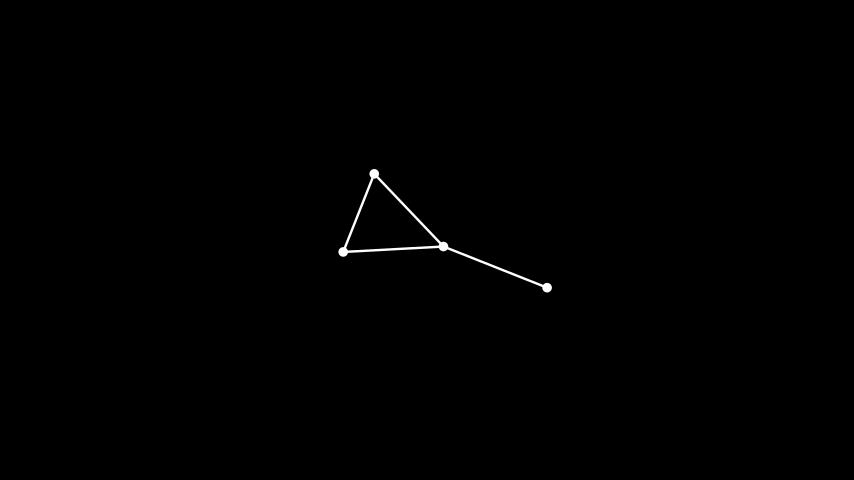

In [8]:
%%manim -pql MovingVertices
config.background_color=BLACK
from manim import *

class MovingVertices(Scene):
    def construct(self):
        vertices = [1, 2, 3, 4]
        edges = [(2, 3), (3, 4), (1, 3), (1, 4)]
        g = Graph(vertices, edges)
        self.add(g)

In [1]:
pip install --upgrade "manim-voiceover[azure,gtts]"

     ------------------------------------ 193.6/193.6 kB 841.3 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: python-slugify
    Found existing installation: python-slugify 5.0.2
    Uninstalling python-slugify-5.0.2:
      Successfully uninstalled python-slugify-5.0.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade "manim-voiceover[all]"

     -------------------------------------- 792.9/792.9 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 89.2/89.2 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 164.1/164.1 kB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 45.4/45.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 581.1/581.1 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 54.2/54.2 kB ? eta 0:00:00
     ------------------------------------- 184.3/184.3 kB 10.9 MB/s eta 0:00:00
     ----------

In [5]:
pip install pyaudio

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install SoX

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install gettext

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement gettext (from versions: none)
ERROR: No matching distribution found for gettext


In [13]:
from manim import *
import pygments.styles as code_styles
from manim_voiceover import VoiceoverScene

from manim_voiceover.services.azure import AzureService

code_style = code_styles.get_style_by_name("one-dark")


class VoiceoverDemo(VoiceoverScene):
    def construct(self):
        # Initialize speech synthesis using Azure's TTS API
        self.set_speech_service(
            AzureService(
                voice="en-US-AriaNeural",
                style="newscast-casual",  # global_speed=1.15
            )
        )
        banner = ManimBanner().scale(0.5)

        with self.voiceover(text="Hey Manim Community!"):
            self.play(
                banner.create(),
            )

        tracker = self.add_voiceover_text(
            "Today, I want to show you how you can generate voiceovers directly in your Python code."
        )

        self.play(banner.expand())
        self.wait(tracker.get_remaining_duration(buff=-1))
        self.play(FadeOut(banner))

        demo_code = Code(
            code='''tracker = self.add_voiceover_text(
    """AI generated voices have become realistic
        enough for use in most content. Using neural
        text-to-speech frees you from the painstaking
        process of recording and manually syncing
        audio to your video."""
)
self.play(Write(demo_code), run_time=tracker.duration)''',
            insert_line_no=False,
            style=code_style,
            background="window",
            font="Consolas",
            language="python",
        ).rescale_to_fit(12, 0)

        tracker = self.add_voiceover_text(
            """AI generated voices have become realistic
                enough for use in most content. Using neural
                text-to-speech frees you from the painstaking
                process of recording and manually syncing
                audio to your video."""
        )
        self.play(Write(demo_code), run_time=tracker.duration)

        with self.voiceover(
            text="""As you can see, Manim started playing this voiceover,
                right as the code object started to be drawn.
                Let's see some more examples."""
        ):
            pass

        self.play(FadeOut(demo_code))

        circle = Circle()
        square = Square().shift(2 * RIGHT)

        with self.voiceover(text="This circle is drawn as I speak.") as tracker:
            self.play(Create(circle), run_time=tracker.duration)

        with self.voiceover(text="Let's shift it to the left 2 units.") as tracker:
            self.play(circle.animate.shift(2 * LEFT), run_time=tracker.duration)

        with self.voiceover(text="Now, let's transform it into a square.") as tracker:
            self.play(Transform(circle, square), run_time=tracker.duration)

        with self.voiceover(text="I would go on, but you get the idea."):
            self.play(FadeOut(circle))

        demo_code2 = Code(
            code="""class VoiceoverDemo(VoiceoverScene):
    def construct(self):
        self.set_speech_service(
            AzureService(
                voice="en-US-AriaNeural",
                style="newscast-casual",
                global_speed=1.15
            )
        )
        circle = Circle()

        with self.voiceover(text="This circle is drawn as I speak."):
            self.play(Create(circle))

        with self.voiceover(text="Let's shift it to the left 2 units.") as tracker:
            self.play(circle.animate.shift(2 * LEFT), run_time=tracker.duration)""",
            insert_line_no=False,
            style=code_style,
            background="window",
            font="Consolas",
            language="python",
        ).rescale_to_fit(12, 0)

        with self.voiceover(text="Let's see how the API works!"):
            self.play(FadeIn(demo_code2.background_mobject))

        with self.voiceover(
            text="First, we create a scene using the Voiceover Scene class from the plugin."
        ):
            self.play(FadeIn(demo_code2.code[:2]))

        with self.voiceover(
            text="Then, we initialize the voiceover by setting the appropriate speech synthesizer."
        ):
            self.play(FadeIn(demo_code2.code[2]))

        with self.voiceover(text="In this example, we use Azure Text-to-speech."):
            self.play(FadeIn(demo_code2.code[3]))

        with self.voiceover(
            text="We use the English speaking neural voice called Aria."
        ):
            self.play(FadeIn(demo_code2.code[4]))

        with self.voiceover(text='We use the style called "newscast casual".'):
            self.play(FadeIn(demo_code2.code[5]))

        with self.voiceover(
            text="""Finally, we give an option to speed up the voiceover
            playback fifteen percent, because the default is a bit too slow."""
        ):
            self.play(FadeIn(demo_code2.code[6:9]))

        with self.voiceover(
            text="""With the configuration out of the way, it is time to animate."""
        ):
            pass

        with self.voiceover(text="""Let's initialize the circle object."""):
            self.play(FadeIn(demo_code2.code[9:11]))

        with self.voiceover(
            text="""Then, we need to tell the scene to start narrating,
            by calling the function "self-dot-voiceover"."""
        ):
            self.play(FadeIn(demo_code2.code[11]))

        with self.voiceover(
            text="""By wrapping our animation inside a "with-statement",
            we ensure that once it finishes playing, it will also wait for
            the voiceover playback to finish."""
        ):
            self.play(FadeIn(demo_code2.code[12]))

        with self.voiceover(
            text="""This is extremely convenient, and let's you chain
            voiceovers back to back without having to think how long they are."""
        ):
            pass

        with self.voiceover(
            text="""We just need to repeat the same pattern with self-dot-voiceover and with-statements. Here is something cool."""
        ):
            self.play(FadeIn(demo_code2.code[14]))

        with self.voiceover(
            text="""We can retrieve the duration of the generated voiceover programmatically, and then use it to define for how long an animation should play."""
        ):
            self.play(FadeIn(demo_code2.code[15]))

        demo_code3 = Code(
            code="""class VoiceoverDemo(VoiceoverScene):
    def construct(self):
        self.set_speech_service(
            AzureService(
                voice="en-US-AriaNeural",
                style="newscast-casual",
                global_speed=1.15
            )
        )
        # self.set_speech_service(
        #     StitcherService("my_voice_recording.mp3")
        # )
        """,
            insert_line_no=False,
            style=code_style,
            background="window",
            font="Consolas",
            language="python",
        ).scale(0.85)

        demo_code4 = (
            Code(
                code="""class VoiceoverDemo(VoiceoverScene):
    def construct(self):
        # self.set_speech_service(
        #     AzureService(
        #         voice="en-US-AriaNeural",
        #         style="newscast-casual",
        #         global_speed=1.15
        #     )
        # )
        # self.set_speech_service(
        #     StitcherService("my_voice_recording.mp3")
        # )
        """,
                insert_line_no=False,
                style=code_style,
                background="window",
                font="Consolas",
                language="python",
            )
            .scale(0.85)
            .align_to(demo_code3, LEFT)
        )

        demo_code5 = (
            Code(
                code="""class VoiceoverDemo(VoiceoverScene):
    def construct(self):
        # self.set_speech_service(
        #     AzureService(
        #         voice="en-US-AriaNeural",
        #         style="newscast-casual",
        #         global_speed=1.15
        #     )
        # )
        self.set_speech_service(
            StitcherService("my_voice_recording.mp3")
        )
        """,
                insert_line_no=False,
                style=code_style,
                background="window",
                font="Consolas",
                language="python",
            )
            .scale(0.85)
            .align_to(demo_code3, LEFT)
        )

        with self.voiceover(
            text="And that's not even the best part! You can switch the AI generated voice with an actual recording of your voice very easily."
        ):
            self.play(FadeOut(demo_code2))
            self.wait()
            text1 = Tex("AI voice")
            arrow = Tex(r"$\rightarrow$")
            text2 = Tex("Voice recording")
            VGroup(text1, arrow, text2).arrange(RIGHT)
            self.play(Write(text1))
            self.play(Write(arrow))
            self.wait()
            self.play(Write(text2))
            self.wait()
            self.play(FadeOut(text1, text2, arrow))

        with self.voiceover(
            text="To do that, you record an MP3 of the final text of your video."
        ):
            self.play(FadeIn(demo_code3))

        with self.voiceover(
            text="""Manim-voiceover then splits your audio automatically and replaces the AI generated voice with your real recording."""
        ):
            self.play(FadeOut(demo_code3.code), FadeIn(demo_code4.code))
            self.play(FadeOut(demo_code4.code), FadeIn(demo_code5.code))

        self.wait(2)

        with self.voiceover(
            text="""Manim-voiceover makes it much easier to do voiceovers for Manim projects."""
        ):
            self.play(FadeOut(demo_code5.code, demo_code3.background_mobject))

        with self.voiceover(
            text="Visit the GitHub repo to start using it in your project."
        ):
            self.play(
                FadeIn(
                    Tex(r"\texttt{https://github.com/ManimCommunity/manim-voiceover}")
                )
            )

        self.wait(5)

ContextualVersionConflict: (python-slugify 5.0.2 (c:\users\payal\anaconda3\lib\site-packages), Requirement.parse('python-slugify<9.0.0,>=8.0.1'), {'manim-voiceover'})

In [11]:
from manim_voiceover import VoiceoverScene

ContextualVersionConflict: (python-slugify 5.0.2 (c:\users\payal\anaconda3\lib\site-packages), Requirement.parse('python-slugify<9.0.0,>=8.0.1'), {'manim-voiceover'})

In [12]:
pip install manim-voiceover

Note: you may need to restart the kernel to use updated packages.


In [12]:
%%manim -pqh Glow

from manim import *

config.background_color = BLACK

class Glow(MovingCameraScene):
    def create_glow(self, x, rad=10, col=BLUE):
        glow_group = VGroup()
        for idx in range(60):
            new_circle = Circle(
                radius=rad * (1.002 ** (idx ** 2)) / 400,
                stroke_opacity=0,
                fill_color=col,
                fill_opacity=0.2 - idx / 300
            ).move_to(x)
            glow_group.add(new_circle)
        return glow_group

    def construct(self):
        # Create the glowing effect
        glowing_group = self.create_glow(ORIGIN)

        # Display the glowing effect
        self.play(Write(glowing_group))

        self.wait(2)  # Wait for 2 seconds

        # Remove the glowing effect
        self.play(FadeOut(glowing_group))


# Run the scene
Glow().render()


In [14]:
%%manim -pql Glow

from manim import *

config.background_color = BLACK

class Glow(MovingCameraScene):
    def create_glow(self, x, rad=10, col=BLUE):
        glow_group = VGroup()
        for idx in range(60):
            new_circle = Circle(
                radius=rad * (1.002 ** (idx ** 2)) / 400,
                stroke_opacity=0,
                fill_color=col,
                fill_opacity=0.2 - idx / 300
            ).move_to(x)
            glow_group.add(new_circle)
        return glow_group

    def construct(self):
        # Create the glowing effect
        glowing_circle = self.create_glow(ORIGIN)

        # Display the glowing effect
        self.play(Write(glowing_circle))

        self.wait(2)  # Wait for 2 seconds

        # Remove the glowing effect
        self.play(FadeOut(glowing_circle))


# Run the scene
Glow().render()


In [34]:
%%manim -pqh TwoSquares

from manim import *
#config.media_width = "100%"
#config.verbosity = "WARNING"
#config.frame_size = (1080,1920)
#config.frame_width = 7.5
config.background_color=BLACK

class TwoSquares(MovingCameraScene):
    def construct(self):
        
        
        
        #Create squares
        square1 = Square(fill_opacity=0, stroke_width=4, stroke_color=WHITE).scale(2).set_z_index(2).shift(LEFT)
        square2 = Square(fill_opacity=0, stroke_width=4, stroke_color=WHITE).scale(1).set_z_index(2).shift(LEFT)
        squareGroup = VGroup(square1, square2)
        

        #Position square2
        square2.next_to(square1, RIGHT, buff=0).shift(DOWN)
        
        #JoinType
        square1.joint_type=LineJointType.ROUND 
        square2.joint_type=LineJointType.ROUND 
        
        #Add dots
        dot1 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(UL)).set_z_index(4)
        dot2 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(UR)).set_z_index(4)
        dot3 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(DL)).set_z_index(4)
        dot4 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(DR)).set_z_index(4)
        dot5 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(UL)).set_z_index(4)
        dot6 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(UR)).set_z_index(4)
        dot7 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(DR)).set_z_index(4)
        
        
        
        #Create lines to form the question
        line1 = Line(square1.get_corner(UR), square2.get_corner(UR), color=WHITE, stroke_width=4).set_z_index(2)
        line2 = Line(square1.get_corner(UL), square2.get_corner(UL), color=WHITE, stroke_width=4).set_z_index(2)
        line3 = Line(square2.get_corner(UL), square1.get_corner(DL), color=WHITE, stroke_width=4).set_z_index(2)
        line4 = Line(square2.get_corner(UR), square1.get_corner(DL), color=WHITE, stroke_width=4).set_z_index(2)
        
        #Make a polygon using the lines
        polygon = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square1.get_corner(DL),
            square2.get_corner(UL), square1.get_corner(UL),
            fill_color="#3DD771", fill_opacity=1, color=WHITE
        )
        
        
        #JoinType
        polygon.joint_type=LineJointType.ROUND 

        X = self.camera.frame.animate.scale(2).move_to(polygon)
        X.save_state()
        self.play(X)
        
        #Show the size of square1
        
        arrow1 = Arrow(DOWN, UP, max_tip_length_to_length_ratio=0.1).next_to(square1, LEFT+UP, buff=0.5).shift(2*DOWN)
        arrow2 = Arrow(UP, DOWN, max_tip_length_to_length_ratio=0.1).next_to(square1, LEFT+DOWN, buff=0.5).shift(2*UP)
        arrows = VGroup(arrow1, arrow2)
        arrows.set_color(WHITE)
        arrows.set_stroke(width = 4)
        #arrows.set_x(0)
        
        size = MathTex("12").set_color(WHITE).set_stroke(width = 1).scale(1)
        size.next_to(arrow1, DOWN, buff = 0.35)
        #size.scale(0.8)
        
        #Add everything
        #self.add(square1, square2, line1, line2, line3, line4, polygon)
    
        
        self.play(GrowFromEdge(square1, DR, point_color=WHITE))
        #self.play(Create(square1))
        self.wait()
        self.play(GrowArrow(arrows[1], point_color=WHITE), GrowArrow(arrows[0], point_color=WHITE), FadeIn(size))
        self.wait()
        self.play(GrowFromEdge(square2, DL, point_color=WHITE))
        #self.play(Create(square2))
        self.wait()
        
        self.play(FadeIn(dot1, dot2, dot3, dot4, dot5, dot6, dot7))
        self.wait(2)
        
        self.play(Create(line1))
        self.play(Create(line4))
        self.play(Create(line2))
        self.play(Create(line3))
        self.wait()
        questionText = Text("Area of the shaded portion?", color = WHITE, font='Athletics', t2c={"shaded": "#3DD771"}).next_to(polygon, UP, buff=1.5).scale(1)

        self.play(FadeIn(polygon))
        self.wait()
        
        self.wait(2)
        #shift_amount = LEFT * 2 
        #camera_frame = self.camera.frame
        question = polygon.copy()
        question.set_stroke(width = 2)
        equal_to_what = MathTex("A(", "\phantom{xxx}", ")\ =\ ? ").scale(1.25).set_color(WHITE).set_stroke(width = 1).next_to(polygon, DOWN, buff=1.5)
        Y = self.camera.frame.animate.move_to(RIGHT)
        self.play(question.animate.next_to(equal_to_what, RIGHT).scale(0.15).shift(5.33*LEFT), FadeIn(equal_to_what), FadeIn(questionText))

        self.wait(5)
        
        #Dashed Lines for solving
        dashed_1 = DashedLine(config.left_side, config.right_side, stroke_width=3)
        dashed_1.move_to(square2, DOWN).set_length(8)
       
        
        self.play(FadeOut(question), FadeOut(equal_to_what, questionText))
        self.wait()
        
        # Show parallel lines
        l1 = Line(square2.get_corner(UL), square2.get_corner(UR), color=PURE_RED, stroke_width=4).set_z_index(2)
        #l2 = Line(square1.get_corner(DL), square2.get_corner(DR), color=PURE_RED, stroke_width=4).set_z_index(2)
        l3 = Line(square1.get_corner(UL), square1.get_corner(UR), color=PURE_RED, stroke_width=4).set_z_index(2)
        l4 = Line(dot3.get_center(), dot7.get_center(), color=PURE_RED, stroke_width=4).set_z_index(2)
        l5 = Line(dot3.get_center(), dashed_1.get_end(), color=PURE_RED, stroke_width=4).set_z_index(2)
        self.play(FadeIn(l1, l4))
        l4_half = Line(dot4.get_center(), dot7.get_center(), color=PURE_RED, stroke_width=4).set_z_index(2)
        arrow_1 = Arrow(start=l1.get_start(), end=l1.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=1).set_z_index(10).shift(0.5*RIGHT)
        arrow_2 = Arrow(start=l4_half.get_start(), end=l4_half.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=1).set_z_index(10).shift(0.5*RIGHT)
        self.play(Indicate(l1, color = None), Indicate(l4, color = None))
        self.play(FadeOut(l1, l4), FadeIn(arrow_1, arrow_2))
        self.wait()
        #Indicate tri1
        
        tri1 = Polygon(dot3.get_center(), dot5.get_center(), dot6.get_center(), color = "#A020F0", fill_opacity=1)
        self.play(FadeIn(tri1))
        self.wait(0.5)
        self.play(FadeOut(tri1))
        
        #self.play(Indicate(tri1, color = "#9E2F00", scale_factor=1), run_time=1.5)
        
        
        # First move
        
        polygon_4sides = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square2.get_corner(UL),
            square1.get_corner(UL),
            fill_color="#3DD771", fill_opacity=1, color=WHITE, stroke_width = 4
        )
        
        
        
        dot8 = Circle(radius=0.08, fill_color=BLACK, fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(DR)).set_z_index(4)
        dot8.shift(2*RIGHT)
        #self.play(FadeIn(dot8))
        
        A = Dot(line1.get_end(),radius=0.01,color=BLACK)
        B = Dot(line3.get_end(),radius=0.01,color=BLACK)
        C = Dot(line1.get_end(),radius=0.01,color=BLACK)        
       
        triangle1 =Polygon(A.get_center(),B.get_center(),C.get_center(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=4)
        
        
        self.add(triangle1, polygon_4sides)
        triangle1.joint_type=LineJointType.ROUND
        self.play(Create(triangle1))
        self.wait()
        
        #line_a1 = Line(square2.get_corner(UL), square1.get_corner(DL), color=BLACK)  # Modify this line
        #line_a2 = Line(square2.get_corner(UR), square1.get_corner(DL), color=BLACK)  # Modify this line
        
        dot3_copy = dot3.copy()
        dot3_copy.set_color(PURE_RED).set_stroke(width = 4, color  =WHITE)
        self.play(FadeIn(dot3_copy))
        self.play(Indicate(dot3_copy, scale_factor=1.7, color = None))
        self.play(FadeIn(l4))
        self.wait(2)
        self.play(FadeIn(dashed_1), Y)
        triangle1.add_updater(lambda x:x.become(Polygon(dot3_copy.get_center(),line3.get_start(),line4.get_start(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=4)))
        self.play( FadeOut(polygon), FadeOut(line3), FadeOut(line4) )
        self.play(FadeOut(l4), FadeIn(l5))
        self.play(dot3_copy.animate.move_to(dot8.get_center()),run_time=2)
        self.wait(0.7)
        
        # Show second parallel lines
        
        #Indicate tri2
        tri2 = Polygon(dot1.get_center(), dot2.get_center(), dot8.get_center(), color = "#A020F0", fill_opacity=1, stroke_width=4, stroke_color = WHITE)
        self.play(FadeIn(tri2))
        self.wait(0.5)
        self.play(FadeOut(tri2,l5), FadeOut(arrow_1, arrow_2))
        self.wait(2)
        
        #self.play(Indicate(tri2, color = "#9E2F00", scale_factor=1), run_time=1.5)
        
        
        self.play(FadeIn(l3,l5))
        l5_half = Line(dot3.get_center(), dot4.get_center(), color=PURE_RED, stroke_width=4).set_z_index(2)
        arrow_3 = Arrow(start=l3.get_start(), end=l3.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=0.5).set_z_index(10).shift(0.5*RIGHT)
        arrow_4 = Arrow(start=l5_half.get_start(), end=l5_half.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=0.5).set_z_index(10).shift(0.5*RIGHT)
        self.play(Indicate(l3, color = None), Indicate(l5, color = None))
        self.play(FadeOut(l3, l5), FadeIn(arrow_3, arrow_4))
        self.wait()
        
        self.play(FadeIn(tri2))
        self.wait(0.5)
        self.play(FadeOut(tri2))
        self.wait(2)

        #Second move
        
        X = Dot(line1.get_start(),radius=0.01,color=BLACK)
        Y = Dot(line2.get_start(),radius=0.01,color=BLACK)
        Z = Dot(dot8.get_center(),radius=0.01,color=BLACK)        
        
        triangle2 =Polygon(X.get_center(),Y.get_center(),Z.get_center(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=4)
        
        
        self.add(triangle2)
        triangle2.joint_type=LineJointType.ROUND
        self.play(Create(triangle2))
        self.wait()
        
        
        
        #line_a1 = Line(square2.get_corner(UL), square1.get_corner(DL), color=BLACK)  # Modify this line
        #line_a2 = Line(square2.get_corner(UR), square1.get_corner(DL), color=BLACK)  # Modify this line
        
        dot8_copy = dot8.copy()
        dot8_copy.set_color(PURE_RED).set_stroke(width = 4, color  =WHITE)
        self.play(FadeIn(dot8_copy))
        self.play(Indicate(dot8_copy, scale_factor=1.7, color = None), FadeOut(dot3_copy))
        self.play(FadeIn(l5))
        self.wait()
        linef1 = Line(square1.get_corner(UR), dot8_copy.get_center(), color=WHITE, stroke_width=4)
        linef2 = Line(square1.get_corner(UL), dot8_copy.get_center(), color=WHITE, stroke_width=4)
        
        triangle2.add_updater(lambda x:x.become(Polygon(dot8_copy.get_center(),linef1.get_start(),linef2.get_start(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=4)))
        
        self.play(FadeOut(polygon_4sides), FadeOut(triangle1), FadeOut(line1), FadeOut(line2))
        
        self.play(dot8_copy.animate.move_to(dot4.get_center()),run_time=2)
        self.wait()
        
        self.play(FadeOut(dot8_copy, l5, dashed_1 ), self.camera.frame.animate.move_to(polygon))
        self.wait(0.7)
        self.wait(2)
        
        # Show answer
        #line = Tex("Area of the shaded portion =")
        #eqn = MathTex(r" \frac{1}{2} ").next_to(line, buff = 0.5)
        #star = Tex("*").next_to(eqn, buff = 0.5)
        #ans = Tex("Area of the bigger square ").next_to(star, buff = 0.5)
        #eqn1 = VGroup(line,eqn,star,ans)
        #eqn1.next_to(dot4, DOWN, buff = 0.5).scale(0.7)
        #self.play(FadeIn(eqn1))
        #self.wait()
        
        #num = Tex("(12 * 12)").scale(0.7).next_to(star, buff = 0.5)
        #self.play(ReplacementTransform(ans,num))
        #self.wait()
        
        #equal_to = Tex("=").next_to(num, buff = 0)
        #final_ans = Tex("72 sq. units").next_to(equal_to, buff = 0.5)
        #equal_to_final_ans = VGroup(equal_to, final_ans).scale(0.7)
        #self.play(FadeIn(equal_to_final_ans))
        #self.wait(2)
        
        tri3 = Polygon(dot1.get_center(), dot2.get_center(), dot4.get_center(), color = "#A020F0", fill_opacity=1, stroke_width=4, stroke_color = WHITE)
        self.play(FadeIn(tri3))
        self.wait(0.5)
        self.play(FadeOut(tri3, arrow_3, arrow_4))
        A = MathTex("A(", "\phantom{xxx}", ")").next_to(square1, 6* DOWN).shift(0.7*LEFT).scale(1.1)
        tri3_copy = Polygon(dot1.get_center(), dot2.get_center(), dot4.get_center(), color = "#3DD771", fill_opacity=1, stroke_width=4, stroke_color = WHITE)

        self.play(FadeIn(A), tri3_copy.animate.scale(0.143).move_to(A).shift(0.19*RIGHT))
        equal_to = MathTex("=").next_to(A, buff = 0.2).scale(1.1)
        self.play(FadeIn(equal_to))

        C = MathTex("A(", "\phantom{xxxx}", ")").next_to(equal_to, buff = 0.2).scale(1.1)
        question.move_to(C).shift(0.205*RIGHT).scale(0.935)

        self.play(FadeIn(C, question))

        grp = VGroup(C, question)
        grp_copy = grp.copy()
        
        grp_tri3 = VGroup(A, tri3_copy)
        grp_tri3_copy = grp_tri3.copy()
        grp_tri3_copy.move_to(grp_copy).shift(0.1*LEFT)
        grp_copy.move_to(grp_tri3).shift(0.2*LEFT)

        play_kw = {"run_time": 1}
        self.play(
            ReplacementTransform(
                grp, grp_copy,
                path_arc=90 * DEGREES,
            ), 
            ReplacementTransform(
                grp_tri3, grp_tri3_copy,
                path_arc=90 * DEGREES,
            ),
            **play_kw
        )
        grp_tri3_copy2 = grp_tri3_copy.copy()

        self.play(grp_tri3_copy2.animate.move_to(grp_copy).shift(2*DOWN))
        equal_to_copy = equal_to.copy()
        equal_to_copy.move_to(equal_to).shift(2*DOWN)
        self.play(FadeIn(equal_to_copy))

        eqn = MathTex(r" \frac{1}{2} ").next_to(equal_to_copy, buff = 0.3).scale(1.1)
        self.play(FadeIn(eqn))
        star = MathTex("\\times").next_to(eqn, buff = 0.2).scale(1.1)
        self.play(FadeIn(star))
        B = MathTex("A(", "\phantom{xxx}", ")").next_to(star, buff = 0.2).scale(1.1)
        square1_copy = square1.copy()
        self.play(FadeIn(B), square1_copy.animate.scale(0.143).move_to(B).shift(0.22*RIGHT).set_fill(color = "#3DD771", opacity = 1))
        self.wait(2)
        size_copy = size.copy()
        #self.play(size_copy.animate.next_to(star, buff = 0.2).scale(1.25), FadeOut(B, square1_copy))
        twlvSq = MathTex("12^2").next_to(star, buff = 0.2).shift(0.1*UP).scale(0.99)
        self.play(FadeTransform(size_copy, twlvSq), FadeOut(B, square1_copy))
        self.wait(2)
        
        eqnGrp = VGroup(eqn, star, twlvSq)
        
        sevTwo = MathTex("72\ sq.\ units").next_to(equal_to_copy, buff = 0.3).scale(1.1)
        
        self.play(TransformMatchingTex(eqnGrp, sevTwo))
        self.wait(2)

        self.play(sevTwo.animate.next_to(equal_to, buff=0.3), FadeOut(grp_tri3_copy2, equal_to_copy,grp_tri3_copy))
        
        finalAns = VGroup(grp_copy, equal_to, sevTwo)
        
        box = SurroundingRectangle(finalAns, color="#A020F0", buff=MED_LARGE_BUFF)
        
        self.play(Create(box))
        
        self.wait(2)

In [5]:
from manim import *
config.media_width = "100%"
config.verbosity = "WARNING"
config.frame_size = (1080,1920)
config.frame_width = 7.5
config.background_color=BLACK

class TwoSquares(MovingCameraScene):
    def construct(self):
        
        
        
        #Create squares
        square1 = Square(fill_opacity=0, stroke_width=4, stroke_color=WHITE).scale(2).set_z_index(2).shift(LEFT)
        square2 = Square(fill_opacity=0, stroke_width=4, stroke_color=WHITE).scale(1).set_z_index(2).shift(LEFT)
        squareGroup = VGroup(square1, square2)
        

        #Position square2
        square2.next_to(square1, RIGHT, buff=0).shift(DOWN)
        
        #JoinType
        square1.joint_type=LineJointType.ROUND 
        square2.joint_type=LineJointType.ROUND 
        
        #Add dots
        dot1 = Circle(radius=0.1, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(UL)).set_z_index(4)
        dot2 = Circle(radius=0.1, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(UR)).set_z_index(4)
        dot3 = Circle(radius=0.1, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(DL)).set_z_index(4)
        dot4 = Circle(radius=0.1, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(DR)).set_z_index(4)
        dot5 = Circle(radius=0.1, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(UL)).set_z_index(4)
        dot6 = Circle(radius=0.1, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(UR)).set_z_index(4)
        dot7 = Circle(radius=0.1, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(DR)).set_z_index(4)
        
        
        
        #Create lines to form the question
        line1 = Line(square1.get_corner(UR), square2.get_corner(UR), color=WHITE, stroke_width=4).set_z_index(2)
        line2 = Line(square1.get_corner(UL), square2.get_corner(UL), color=WHITE, stroke_width=4).set_z_index(2)
        line3 = Line(square2.get_corner(UL), square1.get_corner(DL), color=WHITE, stroke_width=4).set_z_index(2)
        line4 = Line(square2.get_corner(UR), square1.get_corner(DL), color=WHITE, stroke_width=4).set_z_index(2)
        
        #Make a polygon using the lines
        polygon = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square1.get_corner(DL),
            square2.get_corner(UL), square1.get_corner(UL),
            fill_color="#A020F0", fill_opacity=1, color=WHITE
        )
        
        
        #JoinType
        polygon.joint_type=LineJointType.ROUND 

        X = self.camera.frame.animate.scale(3).move_to(polygon)
        X.save_state()
        self.play(X)
        
        #Show the size of square1
        
        arrow1 = Arrow(DOWN, UP, max_tip_length_to_length_ratio=0.1).next_to(square1, LEFT+UP, buff=0.5).shift(2*DOWN)
        arrow2 = Arrow(UP, DOWN, max_tip_length_to_length_ratio=0.1).next_to(square1, LEFT+DOWN, buff=0.5).shift(2*UP)
        arrows = VGroup(arrow1, arrow2)
        arrows.set_color(WHITE)
        arrows.set_stroke(width = 4)
        #arrows.set_x(0)
        
        size = MathTex("12").set_color("#FFBA07").set_stroke(width = 1).scale(1)
        size.next_to(arrow1, DOWN, buff = 0.35)
        #size.scale(0.8)
        
        #Add everything
        #self.add(square1, square2, line1, line2, line3, line4, polygon)
    
        
        self.play(GrowFromEdge(square1, DR, point_color=WHITE))
        #self.play(Create(square1))
        self.wait()
        self.play(GrowArrow(arrows[1], point_color=WHITE), GrowArrow(arrows[0], point_color=WHITE), FadeIn(size))
        self.wait()
        self.play(GrowFromEdge(square2, DL, point_color=WHITE))
        #self.play(Create(square2))
        self.wait(3)
        
        self.play(FadeIn(dot1, dot2, dot3, dot4, dot5, dot6, dot7))
        self.wait(2)
        
        self.play(Create(line1))
        self.play(Create(line4))
        self.play(Create(line2))
        self.play(Create(line3))
        self.wait()
        questionText = Text("Area of the shaded portion?", color = WHITE, font='Athletics', t2c={"shaded": "#A020F0"}).next_to(polygon, UP, buff=1.5).scale(1)

        self.play(FadeIn(polygon))
        self.wait()
        
        self.wait(2)
        #shift_amount = LEFT * 2 
        #camera_frame = self.camera.frame
        question = polygon.copy()
        question.set_stroke(width = 2)
        equal_to_what = MathTex("A(", "\phantom{xxx}", ")\ =\ ? ").scale(1.25).set_color(WHITE).set_stroke(width = 1).next_to(polygon, DOWN, buff=1.5)
        Y = self.camera.frame.animate.move_to(RIGHT)
        self.play(question.animate.next_to(equal_to_what, RIGHT).scale(0.15).shift(5.33*LEFT), FadeIn(equal_to_what), FadeIn(questionText))

        self.wait(5)
        
        #Dashed Lines for solving
        dashed_1 = DashedLine(config.left_side, config.right_side, stroke_width=3)
        dashed_1.move_to(square2, DOWN).set_length(8)
       
        
        self.play(FadeOut(question), FadeOut(equal_to_what, questionText))
        self.wait()
        
        # Show parallel lines
        l1 = Line(square2.get_corner(UL), square2.get_corner(UR), color=PURE_RED, stroke_width=4).set_z_index(2)
        #l2 = Line(square1.get_corner(DL), square2.get_corner(DR), color=PURE_RED, stroke_width=4).set_z_index(2)
        l3 = Line(square1.get_corner(UL), square1.get_corner(UR), color=PURE_RED, stroke_width=4).set_z_index(2)
        l4 = Line(dot3.get_center(), dot7.get_center(), color=PURE_RED, stroke_width=4).set_z_index(2)
        l5 = Line(dot3.get_center(), dashed_1.get_end(), color=PURE_RED, stroke_width=4).set_z_index(2)
        self.play(FadeIn(l1, l4))
        l4_half = Line(dot4.get_center(), dot7.get_center(), color=PURE_RED, stroke_width=4).set_z_index(2)
        arrow_1 = Arrow(start=l1.get_start(), end=l1.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=1).set_z_index(10).shift(0.5*RIGHT)
        arrow_2 = Arrow(start=l4_half.get_start(), end=l4_half.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=1).set_z_index(10).shift(0.5*RIGHT)
        self.play(Indicate(l1, color = None, scale_factor = 1.4), Indicate(l4, color = None))
        self.play(FadeOut(l1, l4), FadeIn(arrow_1, arrow_2))
        self.wait()
        #Indicate tri1
        
        tri1 = Polygon(dot3.get_center(), dot5.get_center(), dot6.get_center(), color = "#0A47C2", fill_opacity=1)
        self.play(FadeIn(tri1))
        self.wait(0.5)
        self.play(FadeOut(tri1))
        
        #self.play(Indicate(tri1, color = "#9E2F00", scale_factor=1), run_time=1.5)
        
        
        # First move
        
        polygon_4sides = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square2.get_corner(UL),
            square1.get_corner(UL),
            fill_color="#A020F0", fill_opacity=1, color=WHITE, stroke_width = 4
        )
        
        
        
        dot8 = Circle(radius=0.1, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(DR)).set_z_index(4)
        dot8.shift(2*RIGHT)
        #self.play(FadeIn(dot8))
        
        A = Dot(line1.get_end(),radius=0.01,color=BLACK)
        B = Dot(line3.get_end(),radius=0.01,color=BLACK)
        C = Dot(line1.get_end(),radius=0.01,color=BLACK)        
       
        triangle1 =Polygon(A.get_center(),B.get_center(),C.get_center(),color=WHITE, fill_color="#A020F0", fill_opacity=1, stroke_width=4)
        
        
        self.add(triangle1, polygon_4sides)
        triangle1.joint_type=LineJointType.ROUND
        self.play(Create(triangle1))
        self.wait()
        
        #line_a1 = Line(square2.get_corner(UL), square1.get_corner(DL), color=BLACK)  # Modify this line
        #line_a2 = Line(square2.get_corner(UR), square1.get_corner(DL), color=BLACK)  # Modify this line
        
        dot3_copy = dot3.copy()
        dot3_copy.set_color(PURE_RED).set_stroke(width = 4, color  =WHITE)
        self.play(FadeIn(dot3_copy))
        self.play(Indicate(dot3_copy, scale_factor=1.7, color = None))
        self.play(FadeIn(l4))
        self.wait(0.5)
        self.play(FadeIn(dashed_1), Y)
        triangle1.add_updater(lambda x:x.become(Polygon(dot3_copy.get_center(),line3.get_start(),line4.get_start(),color=WHITE, fill_color="#A020F0", fill_opacity=1, stroke_width=4)))
        self.play( FadeOut(polygon), FadeOut(line3), FadeOut(line4) )
        self.play(FadeOut(l4), FadeIn(l5))
        self.play(dot3_copy.animate.move_to(dot8.get_center()),run_time=2)
        self.wait(0.7)
        
        # Show second parallel lines
        
        #Indicate tri2
        tri2 = Polygon(dot1.get_center(), dot2.get_center(), dot8.get_center(), color = "#0A47C2", fill_opacity=1, stroke_width=4, stroke_color = WHITE)
        self.play(FadeIn(tri2))
        self.wait(0.5)
        self.play(FadeOut(tri2,l5), FadeOut(arrow_1, arrow_2), dot3_copy.animate.set_fill(color  ="#0A47C2" ))
        self.wait(2)
        
        #self.play(Indicate(tri2, color = "#9E2F00", scale_factor=1), run_time=1.5)
        
        
        self.play(FadeIn(l3,l5))
        l5_half = Line(dot3.get_center(), dot4.get_center(), color=PURE_RED, stroke_width=4).set_z_index(2)
        arrow_3 = Arrow(start=l3.get_start(), end=l3.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=0.5).set_z_index(10).shift(0.5*RIGHT)
        arrow_4 = Arrow(start=l5_half.get_start(), end=l5_half.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=0.5).set_z_index(10).shift(0.5*RIGHT)
        self.play(Indicate(l3, color = None), Indicate(l5, color = None))
        self.play(FadeOut(l3, l5), FadeIn(arrow_3, arrow_4))
        self.wait()
        
        self.play(FadeIn(tri2))
        self.wait(0.5)
        self.play(FadeOut(tri2))
        self.wait(2)

        #Second move
        
        X = Dot(line1.get_start(),radius=0.01,color=BLACK)
        Y = Dot(line2.get_start(),radius=0.01,color=BLACK)
        Z = Dot(dot8.get_center(),radius=0.01,color=BLACK)        
        
        triangle2 =Polygon(X.get_center(),Y.get_center(),Z.get_center(),color=WHITE, fill_color="#A020F0", fill_opacity=1, stroke_width=4)
        
        
        self.add(triangle2)
        triangle2.joint_type=LineJointType.ROUND
        self.play(Create(triangle2))
        self.wait()
        
        
        
        #line_a1 = Line(square2.get_corner(UL), square1.get_corner(DL), color=BLACK)  # Modify this line
        #line_a2 = Line(square2.get_corner(UR), square1.get_corner(DL), color=BLACK)  # Modify this line
        
        dot8_copy = dot8.copy()
        dot8_copy.set_color(PURE_RED).set_stroke(width = 4, color  =WHITE)
        self.play(FadeIn(dot8_copy))
        self.play(Indicate(dot8_copy, scale_factor=1.7, color = None), FadeOut(dot3_copy))
        self.play(FadeIn(l5))
        self.wait()
        linef1 = Line(square1.get_corner(UR), dot8_copy.get_center(), color=WHITE, stroke_width=4)
        linef2 = Line(square1.get_corner(UL), dot8_copy.get_center(), color=WHITE, stroke_width=4)
        
        triangle2.add_updater(lambda x:x.become(Polygon(dot8_copy.get_center(),linef1.get_start(),linef2.get_start(),color=WHITE, fill_color="#A020F0", fill_opacity=1, stroke_width=4)))
        
        self.play(FadeOut(polygon_4sides), FadeOut(triangle1), FadeOut(line1), FadeOut(line2))
        
        self.play(dot8_copy.animate.move_to(dot4.get_center()),run_time=2)
        self.wait()
        
        self.play(FadeOut(dot8_copy, l5, dashed_1 ), self.camera.frame.animate.move_to(polygon))
        self.wait(0.7)
        self.wait(2)
        
        # Show answer
        #line = Tex("Area of the shaded portion =")
        #eqn = MathTex(r" \frac{1}{2} ").next_to(line, buff = 0.5)
        #star = Tex("*").next_to(eqn, buff = 0.5)
        #ans = Tex("Area of the bigger square ").next_to(star, buff = 0.5)
        #eqn1 = VGroup(line,eqn,star,ans)
        #eqn1.next_to(dot4, DOWN, buff = 0.5).scale(0.7)
        #self.play(FadeIn(eqn1))
        #self.wait()
        
        #num = Tex("(12 * 12)").scale(0.7).next_to(star, buff = 0.5)
        #self.play(ReplacementTransform(ans,num))
        #self.wait()
        
        #equal_to = Tex("=").next_to(num, buff = 0)
        #final_ans = Tex("72 sq. units").next_to(equal_to, buff = 0.5)
        #equal_to_final_ans = VGroup(equal_to, final_ans).scale(0.7)
        #self.play(FadeIn(equal_to_final_ans))
        #self.wait(2)
        
        tri3 = Polygon(dot1.get_center(), dot2.get_center(), dot4.get_center(), color = "#0A47C2", fill_opacity=1, stroke_width=4, stroke_color = WHITE)
        self.play(FadeIn(tri3))
        self.wait(0.5)
        self.play(FadeOut(tri3, arrow_3, arrow_4))
        A = MathTex("A(", "\phantom{xxx}", ")").next_to(square1, 6* DOWN).shift(0.7*LEFT).scale(1.1)
        tri3_copy = Polygon(dot1.get_center(), dot2.get_center(), dot4.get_center(), color = "#A020F0", fill_opacity=1, stroke_width=4, stroke_color = WHITE)

        self.play(FadeIn(A), tri3_copy.animate.scale(0.143).move_to(A).shift(0.19*RIGHT))
        equal_to = MathTex("=").next_to(A, buff = 0.2).scale(1.1)
        self.play(FadeIn(equal_to))

        C = MathTex("A(", "\phantom{xxxx}", ")").next_to(equal_to, buff = 0.2).scale(1.1)
        question.move_to(C).shift(0.205*RIGHT).scale(0.935)

        self.play(FadeIn(C, question))

        grp = VGroup(C, question)
        grp_copy = grp.copy()
        
        grp_tri3 = VGroup(A, tri3_copy)
        grp_tri3_copy = grp_tri3.copy()
        grp_tri3_copy.move_to(grp_copy).shift(0.1*LEFT)
        grp_copy.move_to(grp_tri3).shift(0.2*LEFT)

        play_kw = {"run_time": 1}
        self.play(
            ReplacementTransform(
                grp, grp_copy,
                path_arc=90 * DEGREES,
            ), 
            ReplacementTransform(
                grp_tri3, grp_tri3_copy,
                path_arc=90 * DEGREES,
            ),
            **play_kw
        )
        grp_tri3_copy2 = grp_tri3_copy.copy()

        self.play(grp_tri3_copy2.animate.move_to(grp_copy).shift(2*DOWN))
        equal_to_copy = equal_to.copy()
        equal_to_copy.move_to(equal_to).shift(2*DOWN)
        self.play(FadeIn(equal_to_copy))

        eqn = MathTex(r" \frac{1}{2} ").next_to(equal_to_copy, buff = 0.3).scale(1.1)
        self.play(FadeIn(eqn))
        star = MathTex("\\times").next_to(eqn, buff = 0.2).scale(1.1)
        self.play(FadeIn(star))
        B = MathTex("A(", "\phantom{xxx}", ")").next_to(star, buff = 0.2).scale(1.1)
        square1_copy = square1.copy()
        self.play(FadeIn(B), square1_copy.animate.scale(0.143).move_to(B).shift(0.22*RIGHT).set_fill(color = "#A020F0", opacity = 1))
        self.wait(2)
        size_copy = size.copy()
        #size_copy.set_color(WHITE)
        #self.play(size_copy.animate.next_to(star, buff = 0.2).scale(1.25), FadeOut(B, square1_copy))
        twlvSq = MathTex("12^2").next_to(star, buff = 0.2).shift(0.1*UP).scale(0.99)
        self.play(FadeTransform(size_copy, twlvSq), FadeOut(B, square1_copy))
        self.wait(2)
        
        eqnGrp = VGroup(eqn, star, twlvSq)
        
        sevTwo = MathTex("72\ sq.\ units").next_to(equal_to_copy, buff = 0.3).scale(1.1)
        
        self.play(TransformMatchingTex(eqnGrp, sevTwo))
        self.wait(2)

        self.play(sevTwo.animate.next_to(equal_to, buff=0.3), FadeOut(grp_tri3_copy2, equal_to_copy,grp_tri3_copy))
        
        finalAns = VGroup(grp_copy, equal_to, sevTwo)
        
        box = SurroundingRectangle(finalAns, color="#FFBA07", buff=MED_LARGE_BUFF)
        
        self.play(Create(box))
        
        self.wait(2)

In [11]:
%%manim -pqh TwoSquares
from manim import *
config.media_width = "100%"
config.verbosity = "WARNING"
config.frame_size = (1080,1920)
config.frame_width = 7.5
config.background_color=BLACK

class TwoSquares(MovingCameraScene):
    def construct(self):
        
        
        
        #Create squares
        square1 = Square(fill_opacity=0, stroke_width=5, stroke_color=WHITE).scale(2).set_z_index(2).shift(LEFT)
        square2 = Square(fill_opacity=0, stroke_width=5, stroke_color=WHITE).scale(1).set_z_index(2).shift(LEFT)
        squareGroup = VGroup(square1, square2)
        

        #Position square2
        square2.next_to(square1, RIGHT, buff=0).shift(DOWN)
        
        #JoinType
        square1.joint_type=LineJointType.ROUND 
        square2.joint_type=LineJointType.ROUND 
        
        #Add dots
        dot1 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(UL)).set_z_index(4)
        dot2 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(UR)).set_z_index(4)
        dot3 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(DL)).set_z_index(4)
        dot4 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(DR)).set_z_index(4)
        dot5 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(UL)).set_z_index(4)
        dot6 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(UR)).set_z_index(4)
        dot7 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(DR)).set_z_index(4)
        
        
        
        #Create lines to form the question
        line1 = Line(square1.get_corner(UR), square2.get_corner(UR), color=WHITE, stroke_width=5).set_z_index(2)
        line2 = Line(square1.get_corner(UL), square2.get_corner(UL), color=WHITE, stroke_width=5).set_z_index(2)
        line3 = Line(square2.get_corner(UL), square1.get_corner(DL), color=WHITE, stroke_width=5).set_z_index(2)
        line4 = Line(square2.get_corner(UR), square1.get_corner(DL), color=WHITE, stroke_width=5).set_z_index(2)
        
        #Make a polygon using the lines
        polygon = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square1.get_corner(DL),
            square2.get_corner(UL), square1.get_corner(UL),
            fill_color="#3DD771", fill_opacity=1, color=WHITE
        )
        
        
        #JoinType
        polygon.joint_type=LineJointType.ROUND 

        X = self.camera.frame.animate.scale(5).move_to(polygon)
        X.save_state()
        self.play(X)
        
        #Show the size of square1
        
        arrow1 = Arrow(DOWN, UP, max_tip_length_to_length_ratio=0.1).next_to(square1, LEFT+UP, buff=0.5).shift(2*DOWN)
        arrow2 = Arrow(UP, DOWN, max_tip_length_to_length_ratio=0.1).next_to(square1, LEFT+DOWN, buff=0.5).shift(2*UP)
        arrows = VGroup(arrow1, arrow2)
        arrows.set_color(WHITE)
        arrows.set_stroke(width = 4)
        #arrows.set_x(0)
        
        size = MathTex("12").set_color("#3DD771").set_stroke(width = 1).scale(1)
        size.next_to(arrow1, DOWN, buff = 0.35)
        #size.scale(0.8)
        
        #Add everything
        #self.add(square1, square2, line1, line2, line3, line4, polygon)
    
        
        self.play(GrowFromEdge(square1, DR, point_color=WHITE))
        #self.play(Create(square1))
        self.wait()
        self.play(GrowArrow(arrows[1], point_color=WHITE), GrowArrow(arrows[0], point_color=WHITE), FadeIn(size))
        self.wait()
        self.play(GrowFromEdge(square2, DL, point_color=WHITE))
        #self.play(Create(square2))
        self.wait(3)
        
        self.play(FadeIn(dot1, dot2, dot3, dot4, dot5, dot6, dot7))
        self.wait(2)
        
        self.play(Create(line1))
        self.play(Create(line4))
        self.play(Create(line2))
        self.play(Create(line3))
        self.wait()
        questionText = Text("Area of the shaded portion?", color = WHITE, font='Athletics', t2c={"shaded": "#3DD771"}).next_to(polygon, UP, buff=1.5).scale(1)

        self.play(FadeIn(polygon))
        self.wait()
        
        self.wait(2)
        #shift_amount = LEFT * 2 
        #camera_frame = self.camera.frame
        question = polygon.copy()
        question.set_stroke(width = 2)
        equal_to_what = MathTex("A(", "\phantom{xxx}", ")\ =\ ? ").scale(1.25).set_color(WHITE).set_stroke(width = 1).next_to(polygon, DOWN, buff=1.5)
        Y = self.camera.frame.animate.move_to(RIGHT)
        self.play(question.animate.next_to(equal_to_what, RIGHT).scale(0.15).shift(5.33*LEFT), FadeIn(equal_to_what), FadeIn(questionText))

        self.wait(5)
        
        #Dashed Lines for solving
        dashed_1 = DashedLine(config.left_side, config.right_side, stroke_width=4)
        dashed_1.move_to(square2, DOWN).set_length(8)
       
        
        self.play(FadeOut(question), FadeOut(equal_to_what, questionText))
        self.wait()
        
        # Show parallel lines
        l1 = Line(square2.get_corner(UL), square2.get_corner(UR), color=PURE_RED, stroke_width=7).set_z_index(2)
        #l2 = Line(square1.get_corner(DL), square2.get_corner(DR), color=PURE_RED, stroke_width=4).set_z_index(2)
        l3 = Line(square1.get_corner(UL), square1.get_corner(UR), color=PURE_RED, stroke_width=7).set_z_index(2)
        l4 = Line(dot3.get_center(), dot7.get_center(), color=PURE_RED, stroke_width=7).set_z_index(2)
        l5 = Line(dot3.get_center(), dashed_1.get_end(), color=PURE_RED, stroke_width=7).set_z_index(2)
        self.play(FadeIn(l1, l4))
        l4_half = Line(dot4.get_center(), dot7.get_center(), color=PURE_RED, stroke_width=7).set_z_index(2)
        arrow_1 = Arrow(start=l1.get_start(), end=l1.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=1).set_z_index(10).shift(0.5*RIGHT)
        arrow_2 = Arrow(start=l4_half.get_start(), end=l4_half.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=1).set_z_index(10).shift(0.5*RIGHT)
        self.play(Indicate(l1, color = None, scale_factor = 1.4), Indicate(l4, color = None))
        self.play(FadeOut(l1, l4), FadeIn(arrow_1, arrow_2))
        self.wait()
        #Indicate tri1
        
        tri1 = Polygon(dot3.get_center(), dot5.get_center(), dot6.get_center(), color = "#0A47C2", fill_opacity=1)
        self.play(FadeIn(tri1))
        self.wait(0.5)
        self.play(FadeOut(tri1))
        
        #self.play(Indicate(tri1, color = "#9E2F00", scale_factor=1), run_time=1.5)
        
        
        # First move
        
        polygon_4sides = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square2.get_corner(UL),
            square1.get_corner(UL),
            fill_color="#3DD771", fill_opacity=1, color=WHITE, stroke_width = 5
        )
        
        
        
        dot8 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(DR)).set_z_index(4)
        dot8.shift(2*RIGHT)
        #self.play(FadeIn(dot8))
        
        A = Dot(line1.get_end(),radius=0.01,color=BLACK)
        B = Dot(line3.get_end(),radius=0.01,color=BLACK)
        C = Dot(line1.get_end(),radius=0.01,color=BLACK)        
       
        triangle1 =Polygon(A.get_center(),B.get_center(),C.get_center(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=5)
        
        
        self.add(triangle1, polygon_4sides)
        triangle1.joint_type=LineJointType.ROUND
        self.play(Create(triangle1))
        self.wait()
        
        #line_a1 = Line(square2.get_corner(UL), square1.get_corner(DL), color=BLACK)  # Modify this line
        #line_a2 = Line(square2.get_corner(UR), square1.get_corner(DL), color=BLACK)  # Modify this line
        
        dot3_copy = dot3.copy()
        dot3_copy.set_color(PURE_RED).set_stroke(width = 4, color  =WHITE)
        self.play(FadeIn(dot3_copy))
        self.play(Indicate(dot3_copy, scale_factor=1.7, color = None))
        self.play(FadeIn(l4))
        self.wait(0.5)
        self.play(FadeIn(dashed_1), Y)
        triangle1.add_updater(lambda x:x.become(Polygon(dot3_copy.get_center(),line3.get_start(),line4.get_start(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=5)))
        self.play( FadeOut(polygon), FadeOut(line3), FadeOut(line4) )
        self.play(FadeOut(l4), FadeIn(l5))
        self.play(dot3_copy.animate.move_to(dot8.get_center()),run_time=2)
        self.wait(0.7)
        
        # Show second parallel lines
        
        #Indicate tri2
        tri2 = Polygon(dot1.get_center(), dot2.get_center(), dot8.get_center(), color = "#0A47C2", fill_opacity=1, stroke_width=5, stroke_color = WHITE)
        self.play(FadeIn(tri2))
        self.wait(0.5)
        self.play(FadeOut(tri2,l5), FadeOut(arrow_1, arrow_2), dot3_copy.animate.set_fill(color  ="#0A47C2" ))
        self.wait(2)
        
        #self.play(Indicate(tri2, color = "#9E2F00", scale_factor=1), run_time=1.5)
        
        
        self.play(FadeIn(l3,l5))
        l5_half = Line(dot3.get_center(), dot4.get_center(), color=PURE_RED, stroke_width=7).set_z_index(2)
        arrow_3 = Arrow(start=l3.get_start(), end=l3.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=0.5).set_z_index(10).shift(0.5*RIGHT)
        arrow_4 = Arrow(start=l5_half.get_start(), end=l5_half.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=0.5).set_z_index(10).shift(0.5*RIGHT)
        self.play(Indicate(l3, color = None), Indicate(l5, color = None))
        self.play(FadeOut(l3, l5), FadeIn(arrow_3, arrow_4))
        self.wait()
        
        self.play(FadeIn(tri2))
        self.wait(0.5)
        self.play(FadeOut(tri2))
        self.wait(2)

        #Second move
        
        X = Dot(line1.get_start(),radius=0.01,color=BLACK)
        Y = Dot(line2.get_start(),radius=0.01,color=BLACK)
        Z = Dot(dot8.get_center(),radius=0.01,color=BLACK)        
        
        triangle2 =Polygon(X.get_center(),Y.get_center(),Z.get_center(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=5)
        
        
        self.add(triangle2)
        triangle2.joint_type=LineJointType.ROUND
        self.play(Create(triangle2))
        self.wait()
        
        
        
        #line_a1 = Line(square2.get_corner(UL), square1.get_corner(DL), color=BLACK)  # Modify this line
        #line_a2 = Line(square2.get_corner(UR), square1.get_corner(DL), color=BLACK)  # Modify this line
        
        dot8_copy = dot8.copy()
        dot8_copy.set_color(PURE_RED).set_stroke(width = 4, color  =WHITE)
        self.play(FadeIn(dot8_copy))
        self.play(Indicate(dot8_copy, scale_factor=1.7, color = None), FadeOut(dot3_copy))
        self.play(FadeIn(l5))
        self.wait()
        linef1 = Line(square1.get_corner(UR), dot8_copy.get_center(), color=WHITE, stroke_width=)
        linef2 = Line(square1.get_corner(UL), dot8_copy.get_center(), color=WHITE, stroke_width=4)
        
        triangle2.add_updater(lambda x:x.become(Polygon(dot8_copy.get_center(),linef1.get_start(),linef2.get_start(),color=WHITE, fill_color="#3DD771", fill_opacity=1, stroke_width=5)))
        
        self.play(FadeOut(polygon_4sides), FadeOut(triangle1), FadeOut(line1), FadeOut(line2))
        
        self.play(dot8_copy.animate.move_to(dot4.get_center()),run_time=2)
        triangle2.suspend_updating()
        self.wait()
        
        self.play(FadeOut(dot8_copy, l5, dashed_1 ), self.camera.frame.animate.move_to(polygon))
        self.wait(0.7)
        self.wait(2)
        
        # Show answer
        #line = Tex("Area of the shaded portion =")
        #eqn = MathTex(r" \frac{1}{2} ").next_to(line, buff = 0.5)
        #star = Tex("*").next_to(eqn, buff = 0.5)
        #ans = Tex("Area of the bigger square ").next_to(star, buff = 0.5)
        #eqn1 = VGroup(line,eqn,star,ans)
        #eqn1.next_to(dot4, DOWN, buff = 0.5).scale(0.7)
        #self.play(FadeIn(eqn1))
        #self.wait()
        
        #num = Tex("(12 * 12)").scale(0.7).next_to(star, buff = 0.5)
        #self.play(ReplacementTransform(ans,num))
        #self.wait()
        
        #equal_to = Tex("=").next_to(num, buff = 0)
        #final_ans = Tex("72 sq. units").next_to(equal_to, buff = 0.5)
        #equal_to_final_ans = VGroup(equal_to, final_ans).scale(0.7)
        #self.play(FadeIn(equal_to_final_ans))
        #self.wait(2)
        
        tri3 = Polygon(dot1.get_center(), dot2.get_center(), dot4.get_center(), color = "#0A47C2", fill_opacity=1, stroke_width=5, stroke_color = WHITE)
        self.play(FadeIn(tri3))
        self.wait(0.5)
        self.play(FadeOut(tri3, arrow_3, arrow_4))
        A = MathTex("A(", "\phantom{xxx}", ")").next_to(square1, 6* DOWN).shift(0.7*LEFT).scale(1.1)
        tri3_copy = Polygon(dot1.get_center(), dot2.get_center(), dot4.get_center(), color = "#3DD771", fill_opacity=1, stroke_width=2, stroke_color = WHITE)

        self.play(FadeIn(A), tri3_copy.animate.scale(0.143).move_to(A).shift(0.19*RIGHT))
        equal_to = MathTex("=").next_to(A, buff = 0.2).scale(1.1)
        self.play(FadeIn(equal_to))

        C = MathTex("A(", "\phantom{xxxx}", ")").next_to(equal_to, buff = 0.2).scale(1.1)
        question.move_to(C).shift(0.205*RIGHT).scale(0.935)

        self.play(FadeIn(C, question))

        grp = VGroup(C, question)
        grp_copy = grp.copy()
        
        grp_tri3 = VGroup(A, tri3_copy)
        grp_tri3_copy = grp_tri3.copy()
        grp_tri3_copy.move_to(grp_copy).shift(0.1*LEFT)
        grp_copy.move_to(grp_tri3).shift(0.2*LEFT)

        play_kw = {"run_time": 1}
        self.play(
            ReplacementTransform(
                grp, grp_copy,
                path_arc=90 * DEGREES,
            ), 
            ReplacementTransform(
                grp_tri3, grp_tri3_copy,
                path_arc=90 * DEGREES,
            ),
            **play_kw
        )
        grp_tri3_copy2 = grp_tri3_copy.copy()

        self.play(grp_tri3_copy2.animate.move_to(grp_copy).shift(2*DOWN))
        equal_to_copy = equal_to.copy()
        equal_to_copy.move_to(equal_to).shift(2*DOWN)
        self.play(FadeIn(equal_to_copy))

        eqn = MathTex(r" \frac{1}{2} ").next_to(equal_to_copy, buff = 0.3).scale(1.1)
        self.play(FadeIn(eqn))
        star = MathTex("\\times").next_to(eqn, buff = 0.2).scale(1.1)
        self.play(FadeIn(star))
        B = MathTex("A(", "\phantom{xxx}", ")").next_to(star, buff = 0.2).scale(1.1)
        square1_copy = square1.copy()
        self.play(FadeIn(B), square1_copy.animate.scale(0.143).move_to(B).shift(0.22*RIGHT).set_fill(color = "#3DD771", opacity = 1))
        self.wait(2)
        size_copy = size.copy()
        #size_copy.set_color(WHITE)
        #self.play(size_copy.animate.next_to(star, buff = 0.2).scale(1.25), FadeOut(B, square1_copy))
        twlvSq = MathTex("12^2").next_to(star, buff = 0.2).shift(0.1*UP).scale(0.99)
        self.play(FadeTransform(size_copy, twlvSq), FadeOut(B, square1_copy))
        self.wait(2)
        
        eqnGrp = VGroup(eqn, star, twlvSq)
        
        sevTwo = MathTex("72").next_to(equal_to_copy, buff = 0.3).scale(1.1)
        
        self.play(TransformMatchingTex(eqnGrp, sevTwo))
        self.wait(2)

        self.play(sevTwo.animate.next_to(equal_to, buff=0.3), FadeOut(grp_tri3_copy2, equal_to_copy,grp_tri3_copy))
        
        finalAns = VGroup(grp_copy, equal_to, sevTwo)
        
        box = SurroundingRectangle(finalAns, color="#3DD771", buff=MED_LARGE_BUFF)
        
        self.play(Create(box))
        
        self.wait(4)

        self.play(FadeOut(finalAns, triangle2, size, box, grp_copy))

        followUp_size = MathTex("10").set_color("#3DD771").set_stroke(width = 1).scale(1)
        followUp_size.move_to(size.get_center())
        square3 = Square(fill_opacity=0, stroke_width=5, stroke_color=WHITE).scale(0.5).set_z_index(2).shift(LEFT)
        square3.next_to(square2, LEFT, buff=0).shift(0.5*DOWN)
        square3.joint_type=LineJointType.ROUND 

        dot9 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square3.get_corner(UL)).set_z_index(4)
        dot10 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square3.get_corner(UR)).set_z_index(4)
        dot11 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square3.get_corner(DL)).set_z_index(4)
        dot12 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square3.get_corner(DR)).set_z_index(4)

        polygon_followUp = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square3.get_corner(UR),
            square2.get_corner(DR), square3.get_corner(UL), square2.get_corner(UL), square1.get_corner(UL),
            fill_color="#3DD771", fill_opacity=1, color=WHITE, stroke_width = 5
        )

        self.play(FadeIn(polygon_followUp, followUp_size, square3, dot9, dot10, dot11, dot12))
        self.wait(2)
        polygon_followUpCopy = polygon_followUp.copy()
        polygon_followUpCopy.set_stroke(width=2)
        self.play(FadeIn(equal_to_what,questionText), polygon_followUpCopy.animate.next_to(equal_to_what, RIGHT).scale(0.14).shift(5.33*LEFT))
        self.wait(3)
        

In [ ]:
%%manim -pqh TwoSquares

config.media_width = "100%"
config.verbosity = "WARNING"
config.frame_size = (1080,1920)
config.frame_width = 7.5
config.background_color=BLACK

class TwoSquares(MovingCameraScene):
    def construct(self):
        
        
        
        #Create squares
        square1 = Square(fill_opacity=0, stroke_width=5, stroke_color=WHITE).scale(2).set_z_index(2).shift(LEFT)
        square2 = Square(fill_opacity=0, stroke_width=5, stroke_color=WHITE).scale(1).set_z_index(2).shift(LEFT)
        squareGroup = VGroup(square1, square2)
        

        #Position square2
        square2.next_to(square1, RIGHT, buff=0).shift(DOWN)
        
        #JoinType
        square1.joint_type=LineJointType.ROUND 
        square2.joint_type=LineJointType.ROUND 
        
        #Add dots
        dot1 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(UL)).set_z_index(4)
        dot2 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(UR)).set_z_index(4)
        dot3 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(DL)).set_z_index(4)
        dot4 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square1.get_corner(DR)).set_z_index(4)
        dot5 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(UL)).set_z_index(4)
        dot6 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(UR)).set_z_index(4)
        dot7 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(DR)).set_z_index(4)
        
        
        
        #Create lines to form the question
        line1 = Line(square1.get_corner(UR), square2.get_corner(UR), color=WHITE, stroke_width=5).set_z_index(2)
        line2 = Line(square1.get_corner(UL), square2.get_corner(UL), color=WHITE, stroke_width=5).set_z_index(2)
        line3 = Line(square2.get_corner(UL), square1.get_corner(DL), color=WHITE, stroke_width=5).set_z_index(2)
        line4 = Line(square2.get_corner(UR), square1.get_corner(DL), color=WHITE, stroke_width=5).set_z_index(2)
        
        #Make a polygon using the lines
        polygon = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square1.get_corner(DL),
            square2.get_corner(UL), square1.get_corner(UL),
            fill_color="#3DD771", fill_opacity=1, color=WHITE
        )
        
        
        #JoinType
        polygon.joint_type=LineJointType.ROUND 

        X = self.camera.frame.animate.scale(5).move_to(polygon)
        X.save_state()
        self.play(X)
        
        #Show the size of square1
        
        arrow1 = Arrow(DOWN, UP, max_tip_length_to_length_ratio=0.1).next_to(square1, LEFT+UP, buff=0.5).shift(2*DOWN)
        arrow2 = Arrow(UP, DOWN, max_tip_length_to_length_ratio=0.1).next_to(square1, LEFT+DOWN, buff=0.5).shift(2*UP)
        arrows = VGroup(arrow1, arrow2)
        arrows.set_color(WHITE)
        arrows.set_stroke(width = 4)
        #arrows.set_x(0)
        
        size = MathTex("12").set_color("#3DD771").set_stroke(width = 1).scale(1)
        size.next_to(arrow1, DOWN, buff = 0.35)
        #size.scale(0.8)
        
        #Add everything
        #self.add(square1, square2, line1, line2, line3, line4, polygon)
    
        
        self.play(GrowFromEdge(square1, DR, point_color=WHITE))
        #self.play(Create(square1))
        self.wait()
        self.play(GrowArrow(arrows[1], point_color=WHITE), GrowArrow(arrows[0], point_color=WHITE), FadeIn(size))
        self.wait()
        self.play(GrowFromEdge(square2, DL, point_color=WHITE))
        #self.play(Create(square2))
        self.wait(3)
        
        self.play(FadeIn(dot1, dot2, dot3, dot4, dot5, dot6, dot7))
        self.wait(2)
        
        self.play(Create(line1))
        self.play(Create(line4))
        self.play(Create(line2))
        self.play(Create(line3))
        self.wait()
        questionText = Text("Area of the shaded portion?", color = WHITE, font='Athletics', t2c={"shaded": "#3DD771"}).next_to(polygon, UP, buff=1.5).scale(1)

        self.play(FadeIn(polygon))
        self.wait()
        
        self.wait(2)
        #shift_amount = LEFT * 2 
        #camera_frame = self.camera.frame
        question = polygon.copy()
        question.set_stroke(width = 2)
        equal_to_what = MathTex("A(", "\phantom{xxx}", ")\ =\ ? ").scale(1.25).set_color(WHITE).set_stroke(width = 1).next_to(polygon, DOWN, buff=1.5)
        Y = self.camera.frame.animate.move_to(RIGHT)
        self.play(question.animate.next_to(equal_to_what, RIGHT).scale(0.15).shift(5.33*LEFT), FadeIn(equal_to_what), FadeIn(questionText))

        self.wait(5)
        
        #Dashed Lines for solving
        dashed_1 = DashedLine(config.left_side, config.right_side, stroke_width=4)
        dashed_1.move_to(square2, DOWN).set_length(8)
       
        
        self.play(FadeOut(question), FadeOut(equal_to_what, questionText))
        self.wait()
        
        # Show parallel lines
        l1 = Line(square2.get_corner(UL), square2.get_corner(UR), color=PURE_RED, stroke_width=7).set_z_index(2)
        #l2 = Line(square1.get_corner(DL), square2.get_corner(DR), color=PURE_RED, stroke_width=4).set_z_index(2)
        l3 = Line(square1.get_corner(UL), square1.get_corner(UR), color=PURE_RED, stroke_width=8.6).set_z_index(2)
        l4 = Line(dot3.get_center(), dot7.get_center(), color=PURE_RED, stroke_width=7).set_z_index(2)
        l5 = Line(dot3.get_center(), dashed_1.get_end(), color=PURE_RED, stroke_width=7).set_z_index(2)
        self.play(FadeIn(l1, l4))
        l4_half = Line(dot4.get_center(), dot7.get_center(), color=PURE_RED, stroke_width=7).set_z_index(2)
        arrow_1 = Arrow(start=l1.get_start(), end=l1.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=1).set_z_index(10).shift(0.5*RIGHT)
        arrow_2 = Arrow(start=l4_half.get_start(), end=l4_half.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=1).set_z_index(10).shift(0.5*RIGHT)
        self.play(Indicate(l1, color = None, scale_factor = 1.4), Indicate(l4, color = None))
        self.play(FadeOut(l1, l4), FadeIn(arrow_1, arrow_2))
        self.wait()
        #Indicate tri1
        
        tri1 = Polygon(dot3.get_center(), dot5.get_center(), dot6.get_center(), color = "#0A47C2", fill_opacity=1, stroke_width = 5)
        self.play(FadeIn(tri1))
        self.wait(0.5)
        
        #self.play(Indicate(tri1, color = "#9E2F00", scale_factor=1), run_time=1.5)
        
        
        # First move
        
        polygon_4sides = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square2.get_corner(UL),
            square1.get_corner(UL),
            fill_color="#3DD771", fill_opacity=1, color=WHITE, stroke_width = 5
        )
        
        
        
        dot8 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square2.get_corner(DR)).set_z_index(4)
        dot8.shift(2*RIGHT)
        #self.play(FadeIn(dot8))
        
        A = Dot(line1.get_end(),radius=0.01,color=BLACK)
        B = Dot(line3.get_end(),radius=0.01,color=BLACK)
        C = Dot(line1.get_end(),radius=0.01,color=BLACK)        
       
        triangle1 =Polygon(A.get_center(),B.get_center(),C.get_center(),color=WHITE, fill_color="#0A47C2", fill_opacity=1, stroke_width=5)
        
        
        #self.add(triangle1)
        triangle1.joint_type=LineJointType.ROUND
        self.play(FadeIn(triangle1, polygon_4sides))
        self.wait()
        
        #line_a1 = Line(square2.get_corner(UL), square1.get_corner(DL), color=BLACK)  # Modify this line
        #line_a2 = Line(square2.get_corner(UR), square1.get_corner(DL), color=BLACK)  # Modify this line
        
        dot3_copy = dot3.copy()
        dot3_copy.set_color(PURE_RED).set_stroke(width = 4, color  =WHITE)
        self.play(FadeIn(dot3_copy))
        self.play(Indicate(dot3_copy, scale_factor=2, color = None))
        self.play(FadeIn(l4))
        self.wait(0.5)
        self.play(FadeIn(dashed_1), Y)
        triangle1.add_updater(lambda x:x.become(Polygon(dot3_copy.get_center(),line3.get_start(),line4.get_start(),color=WHITE, fill_color="#0A47C2", fill_opacity=1, stroke_width=5)))
        self.wait(2)
        
        self.play( FadeOut(polygon, tri1), FadeOut(line3), FadeOut(line4) )
        self.wait(2)
        self.play(FadeOut(l4), FadeIn(l5))
        self.wait(2)
        
        triangle1_pos = Polygon(dot5.get_center(),dot6.get_center(),dot8.get_center(),color=WHITE, fill_color="#3DD771", fill_opacity=0.25, stroke_width=5).set_z_index(0)
        
        self.play(AnimationGroup(AnimationGroup(dot3_copy.animate.move_to(dot8.get_center())), AnimationGroup(FadeIn(triangle1_pos)), lag_ratio=0), run_time=2)
            
        #Indicate tri2
        tri2 = Polygon(dot1.get_center(), dot2.get_center(), dot8.get_center(), color = "#3DD771", fill_opacity=1, stroke_width=5, stroke_color = WHITE)
        tri2.joint_type=LineJointType.ROUND 
        #self.play(Indicate(tri2), run_time=1.5, color = None)
        triangle1.set_z_index(0)
        self.play(FadeIn(tri2), FadeOut(triangle1_pos))
        self.play(FadeOut(triangle1))
        self.play(Indicate(tri2, color = None, scale_factor=1.1))
        self.wait()
        
        
        #Second move
        
        X = Dot(line1.get_start(),radius=0.01,color=BLACK)
        Y = Dot(line2.get_start(),radius=0.01,color=BLACK)
        Z = Dot(dot8.get_center(),radius=0.01,color=BLACK)        
        
        triangle2 =Polygon(X.get_center(),Y.get_center(),Z.get_center(),color=WHITE, fill_color="#0A47C2", fill_opacity=1, stroke_width=5)
        triangle2.joint_type=LineJointType.ROUND
        
        self.play(FadeOut(polygon_4sides), FadeOut(arrow_1, arrow_2), dot3_copy.animate.set_fill(color  ="#0A47C2" ))
        self.wait(2)
        
        #self.play(Indicate(tri2, color = "#9E2F00", scale_factor=1), run_time=1.5)
        
        self.play(FadeIn(l3))
        l5_half = Line(dot3.get_center(), dot4.get_center(), color=PURE_RED, stroke_width=7).set_z_index(2)
        arrow_3 = Arrow(start=l3.get_start(), end=l3.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=0.5).set_z_index(10).shift(0.5*RIGHT)
        arrow_4 = Arrow(start=l5_half.get_start(), end=l5_half.get_center(), color=WHITE,stroke_width=0.5,max_tip_length_to_length_ratio=0.5).set_z_index(10).shift(0.5*RIGHT)
        self.play(Indicate(l3, color = None, scale_factor = 1.4), Indicate(l5, color = None))
        self.play(FadeOut(l3, l5), FadeIn(arrow_3, arrow_4))
        self.wait()

        self.play(FadeIn(triangle2))
        tri2.set_z_index(0)
        self.play(FadeOut(tri2))
        
        dot8_copy = dot8.copy()
        dot8_copy.set_color(PURE_RED).set_stroke(width = 4, color  =WHITE)
        self.play(FadeIn(dot8_copy))
        self.play(Indicate(dot8_copy, scale_factor=2, color = None), FadeOut(dot3_copy))
        self.play(FadeIn(l5))
        self.wait()
        linef1 = Line(square1.get_corner(UR), dot8_copy.get_center(), color=WHITE, stroke_width=5)
        linef2 = Line(square1.get_corner(UL), dot8_copy.get_center(), color=WHITE, stroke_width=5)
        
        triangle2.add_updater(lambda x:x.become(Polygon(dot8_copy.get_center(),linef1.get_start(),linef2.get_start(),color=WHITE, fill_color="#0A47C2", fill_opacity=1, stroke_width=5)))
        
        self.play(FadeOut(line1), FadeOut(line2))

        triangle2_pos = Polygon(dot1.get_center(),dot2.get_center(),dot4.get_center(),color=WHITE, fill_color="#3DD771", fill_opacity=0.25, stroke_width=5).set_z_index(0)
        
        self.play(AnimationGroup(AnimationGroup(dot8_copy.animate.move_to(dot4.get_center())), AnimationGroup(FadeIn(triangle2_pos)), lag_ratio=0), run_time=2)
        
        #self.play(dot8_copy.animate.move_to(dot4.get_center()),run_time=2)
        triangle2.suspend_updating()
        self.wait()

        tri3 = Polygon(dot1.get_center(), dot2.get_center(), dot4.get_center(), color = "#3DD771", fill_opacity=1, stroke_width=5, stroke_color = WHITE)
        self.wait(0.5)
        
        self.play(FadeIn(tri3), FadeOut(triangle2_pos))
        triangle2.set_z_index(0)
        self.play(FadeOut(triangle2))
        
        self.play(FadeOut(dot8_copy, l5, dashed_1 ), self.camera.frame.animate.move_to(polygon))
        self.wait(0.7)
        self.wait(2)
        
        # Show answer
        #line = Tex("Area of the shaded portion =")
        #eqn = MathTex(r" \frac{1}{2} ").next_to(line, buff = 0.5)
        #star = Tex("*").next_to(eqn, buff = 0.5)
        #ans = Tex("Area of the bigger square ").next_to(star, buff = 0.5)
        #eqn1 = VGroup(line,eqn,star,ans)
        #eqn1.next_to(dot4, DOWN, buff = 0.5).scale(0.7)
        #self.play(FadeIn(eqn1))
        #self.wait()
        
        #num = Tex("(12 * 12)").scale(0.7).next_to(star, buff = 0.5)
        #self.play(ReplacementTransform(ans,num))
        #self.wait()
        
        #equal_to = Tex("=").next_to(num, buff = 0)
        #final_ans = Tex("72 sq. units").next_to(equal_to, buff = 0.5)
        #equal_to_final_ans = VGroup(equal_to, final_ans).scale(0.7)
        #self.play(FadeIn(equal_to_final_ans))
        #self.wait(2)
        
        
        self.play(FadeOut(arrow_3, arrow_4))
        A = MathTex("A(", "\phantom{xxx}", ")").next_to(square1, 6* DOWN).shift(0.7*LEFT).scale(1.1).shift(0.5*RIGHT)
        tri3_copy = Polygon(dot1.get_center(), dot2.get_center(), dot4.get_center(), color = "#3DD771", fill_opacity=1, stroke_width=2, stroke_color = WHITE)

        self.play(FadeIn(A), tri3_copy.animate.scale(0.143).move_to(A).shift(0.19*RIGHT))
        equal_to = MathTex("=").next_to(A, buff = 0.2).scale(1.1)
        self.play(FadeIn(equal_to))

        C = MathTex("A(", "\phantom{xxxx}", ")").next_to(equal_to, buff = 0.2).scale(1.1)
        question.move_to(C).shift(0.205*RIGHT).scale(0.935)

        self.play(FadeIn(C, question))

        grp = VGroup(C, question)
        grp_copy = grp.copy()
        
        grp_tri3 = VGroup(A, tri3_copy)
        grp_tri3_copy = grp_tri3.copy()
        grp_tri3_copy.move_to(grp_copy).shift(0.1*LEFT)
        grp_copy.move_to(grp_tri3).shift(0.2*LEFT)

        play_kw = {"run_time": 1}
        self.play(
            ReplacementTransform(
                grp, grp_copy,
                path_arc=90 * DEGREES,
            ), 
            ReplacementTransform(
                grp_tri3, grp_tri3_copy,
                path_arc=90 * DEGREES,
            ),
            **play_kw
        )
        grp_tri3_copy2 = grp_tri3_copy.copy()

        self.play(grp_tri3_copy2.animate.move_to(grp_copy).shift(2*DOWN))
        equal_to_copy = equal_to.copy()
        equal_to_copy.move_to(equal_to).shift(2*DOWN)
        self.play(FadeIn(equal_to_copy))

        eqn = MathTex(r" \frac{1}{2} ").next_to(equal_to_copy, buff = 0.3).scale(1.1)
        self.play(FadeIn(eqn))
        star = MathTex("\\times").next_to(eqn, buff = 0.2).scale(1.1)
        self.play(FadeIn(star))
        B = MathTex("A(", "\phantom{xxx}", ")").next_to(star, buff = 0.2).scale(1.1)
        square1_copy = square1.copy()
        self.play(FadeIn(B), square1_copy.animate.scale(0.143).move_to(B).shift(0.22*RIGHT).set_fill(color = "#3DD771", opacity = 1))
        self.wait(2)
        size_copy = size.copy()
        #size_copy.set_color(WHITE)
        #self.play(size_copy.animate.next_to(star, buff = 0.2).scale(1.25), FadeOut(B, square1_copy))
        twlvSq = MathTex("12^2").next_to(star, buff = 0.2).shift(0.1*UP).scale(0.99)
        self.play(FadeTransform(size_copy, twlvSq), FadeOut(B, square1_copy))
        self.wait(2)
        
        eqnGrp = VGroup(eqn, star, twlvSq)
        
        sevTwo = MathTex("72").next_to(equal_to_copy, buff = 0.3).scale(1.1)
        
        self.play(TransformMatchingTex(eqnGrp, sevTwo))
        self.wait(2)

        self.play(sevTwo.animate.next_to(equal_to, buff=0.3), FadeOut(grp_tri3_copy2, equal_to_copy,grp_tri3_copy))
        
        finalAns = VGroup(grp_copy, equal_to, sevTwo)
        
        box = SurroundingRectangle(finalAns, color="#3DD771", buff=MED_LARGE_BUFF)
        
        self.play(Create(box))
        
        self.wait(4)

        self.play(FadeOut(finalAns, tri3, size, box, grp_copy))

        followUp_size = MathTex("10").set_color("#3DD771").set_stroke(width = 1).scale(1)
        followUp_size.move_to(size.get_center())
        square3 = Square(fill_opacity=0, stroke_width=5, stroke_color=WHITE).scale(0.5).set_z_index(2).shift(LEFT)
        square3.next_to(square2, LEFT, buff=0).shift(0.5*DOWN)
        square3.joint_type=LineJointType.ROUND 

        dot9 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square3.get_corner(UL)).set_z_index(4)
        dot10 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square3.get_corner(UR)).set_z_index(4)
        dot11 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square3.get_corner(DL)).set_z_index(4)
        dot12 = Circle(radius=0.09, fill_color="#0A47C2", fill_opacity=1, stroke_width=4, stroke_color=WHITE).move_to(square3.get_corner(DR)).set_z_index(4)

        polygon_followUp = Polygon(
            square1.get_corner(UR), square2.get_corner(UR), square3.get_corner(UR),
            square2.get_corner(DR), square3.get_corner(UL), square2.get_corner(UL), square1.get_corner(UL),
            fill_color="#3DD771", fill_opacity=1, color=WHITE, stroke_width = 5
        )

        self.play(FadeIn(polygon_followUp, followUp_size, square3, dot9, dot10, dot11, dot12))
        self.wait(2)
        polygon_followUpCopy = polygon_followUp.copy()
        polygon_followUpCopy.set_stroke(width=2)
        self.play(FadeIn(equal_to_what,questionText), polygon_followUpCopy.animate.next_to(equal_to_what, RIGHT).scale(0.14).shift(5.33*LEFT))
        self.wait(3)
        